<a href="https://colab.research.google.com/github/jcdumlao14/My-Notes-ml-zoomcamp2022/blob/main/Copy_of_Week8_1b_notes_ML_NeuralNetworks%26Deep_Learning_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8. Neural Networks and Deep Learning**

This week, we'll learn about neural nets and build a model for classifying images of clothes



## **8.5 Transfer learning** (video 5)

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

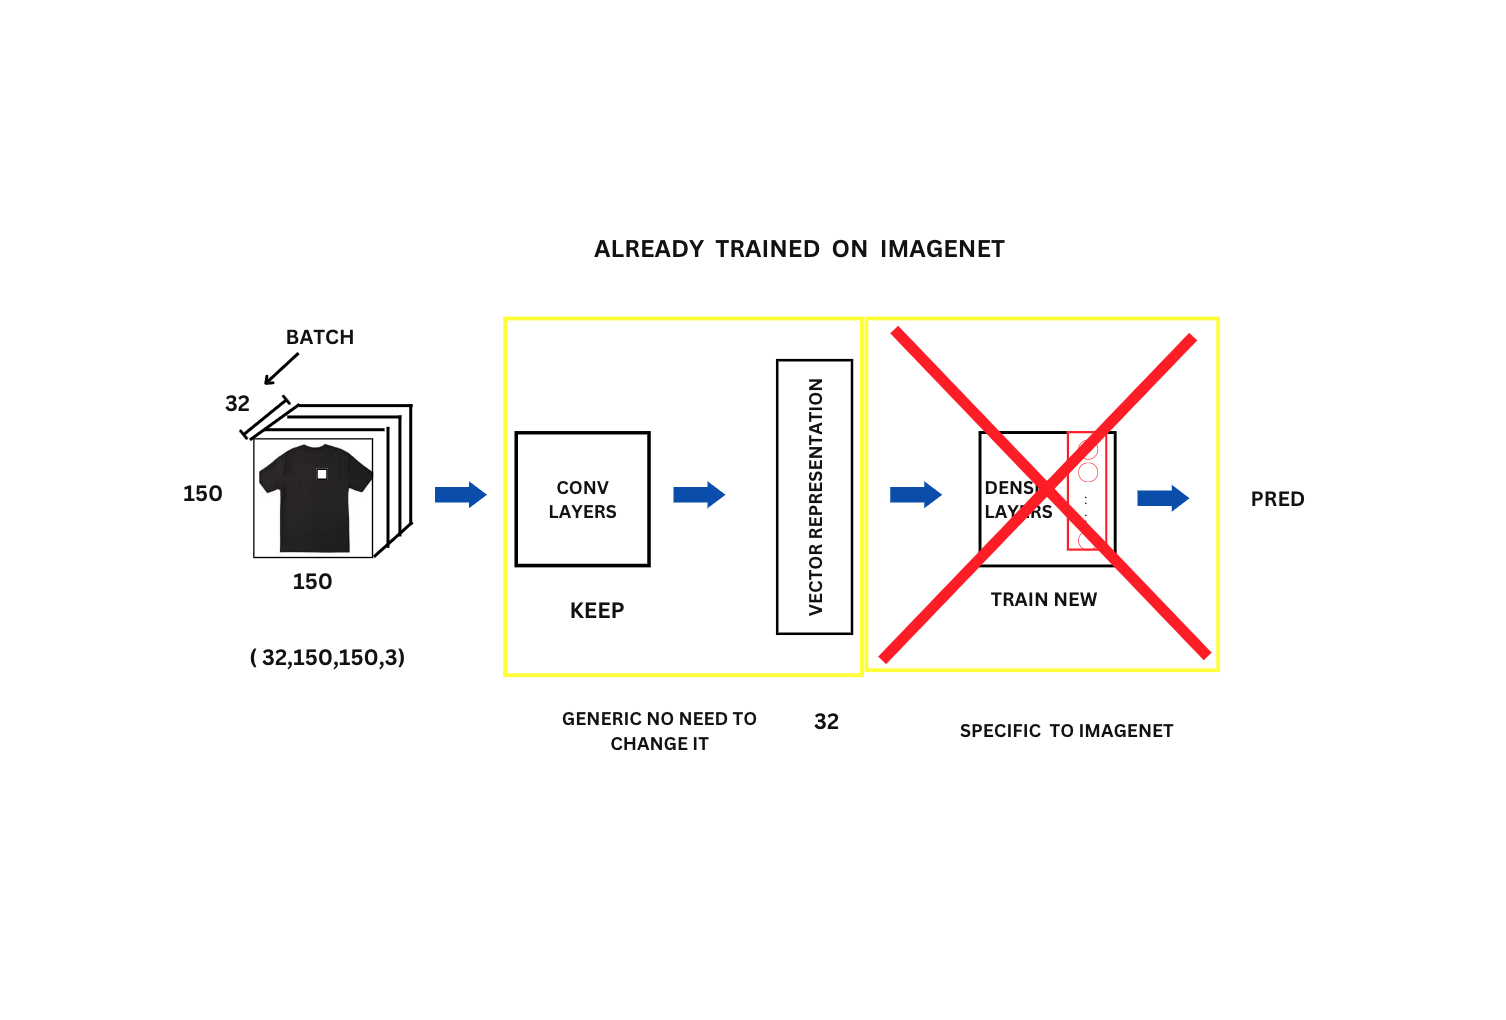

* So remember we talked about how each layer contains a bunch of filters these filters are learnable the model learns these filters during training and the filters it learns are quite generic these filters can be used for many purposes somebody trained this model on imagenet so they trained all this bunch of filters and the model learned to take the image any picture and convert it into some vector representation this is quite generic and we don't need to change it for our task training these filters in the convolution layers is very difficult you need to have a lot of images so a model needs to see a lot of images to come up with filters that make sense so the model needs to see a huge amount of images to be able to come up with filters like that then we have a bunch of dense layers after we converted our image into vector representation we have a bunch of dense layers for making the final prediction and these dense layers they are specific to the dataset, remember we talked about that in imagenet there are 1,000 different classes so that's why the output it has here things like it's a dense layer the size of (1,000) one thousand this is quite specific to this particular dataset and we usually don't need it so let's say in our problem we want to predict only (10) ten classes and many of these classes 

* Like for example t-shirts don't even exist in imagenet so we don't need them the vector representation that we have from imagenet is quite useful but the dense layers are not, so what we want to do is we want to keep the convolutional layers but we want to **train new** dense layers and this is the idea behind transfer learning a model was already trained it already has all these convolutional layers all these filters so we just reuse that and build on top of that and we throw away dense layers from imagenet and have our own dense layers this way everything that a model learned previously the most difficult part can be reused and were kind of transferring this knowledge to a new model this is the main idea behind transfer learning so let's see how we can do it with Keras.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* To be able to do it with keras the first thing we need to do is read our dataset for that there is a special class called image data generator that lets us read images from whatever place where we start and use them for training.
* Pre-processing image then the classes image data generator let's have it for training in which data generator and the only thing we need to specify the pre-processing function.

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


* To read from directory
* Batch size is how many images at once we need so it will not be just one image but it will be multiple however many we want let's say 32 images so it means that we'll have 32 images this is our batch we have 32 images each image will be 150 by 150 and remember that we also have three channels so the shape of our batch will be 32 150 by 150 by three and then our batch will go through convolutional layers then we will have 32 vectors one for each and then we'll have 32 different predictions at the end here we specify the batch size say 32 and that's all we need.
* Found 3,068 images and there are 10 classes total.
* What we can see now is we can see what kind of classes are there.

In [ ]:
!ls clothing-dataset-small/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [ ]:
!ls -l clothing-dataset-small/train

total 260
drwxr-xr-x 2 root root 20480 Nov 12 23:39 dress
drwxr-xr-x 2 root root 12288 Nov 12 23:39 hat
drwxr-xr-x 2 root root 36864 Nov 12 23:39 longsleeve
drwxr-xr-x 2 root root 20480 Nov 12 23:39 outwear
drwxr-xr-x 2 root root 36864 Nov 12 23:39 pants
drwxr-xr-x 2 root root 20480 Nov 12 23:39 shirt
drwxr-xr-x 2 root root 20480 Nov 12 23:39 shoes
drwxr-xr-x 2 root root 20480 Nov 12 23:39 shorts
drwxr-xr-x 2 root root 12288 Nov 12 23:39 skirt
drwxr-xr-x 2 root root 65536 Nov 12 23:39 t-shirt


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

* To be able to get the next butch to need to use this next function when we do for loop internally as invokes this next function.

In [ ]:
X, y = next(train_ds)

In [ ]:
X

array([[[[-0.41960782, -0.70980394, -0.92156863],
         [-0.4588235 , -0.70980394, -0.8901961 ],
         [-0.46666664, -0.70980394, -0.8666667 ],
         ...,
         [-0.56078434, -0.8117647 , -0.9764706 ],
         [-0.5294118 , -0.7882353 , -0.9372549 ],
         [-0.5529412 , -0.8117647 , -0.94509804]],

        [[-0.38039213, -0.67058825, -0.88235295],
         [-0.45098037, -0.7019608 , -0.88235295],
         [-0.44313723, -0.6862745 , -0.84313726],
         ...,
         [-0.5294118 , -0.78039217, -0.94509804],
         [-0.52156866, -0.78039217, -0.92941177],
         [-0.56078434, -0.81960785, -0.9529412 ]],

        [[-0.36470586, -0.654902  , -0.8666667 ],
         [-0.3960784 , -0.64705884, -0.827451  ],
         [-0.4352941 , -0.6784314 , -0.8352941 ],
         ...,
         [-0.54509807, -0.79607844, -0.9607843 ],
         [-0.54509807, -0.8039216 , -0.9529412 ],
         [-0.54509807, -0.8039216 , -0.9372549 ]],

        ...,

        [[ 0.19215691, -0.08235294, -0

In [ ]:
X.shape

(32, 150, 150, 3)

* Load a bunch of images actually and applies this process input function because we asked it to apply it and if we look at the shape then it's 32 by 150 by 150 by 3 exactly likely what we wrote.

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* This is how our target variable looks like

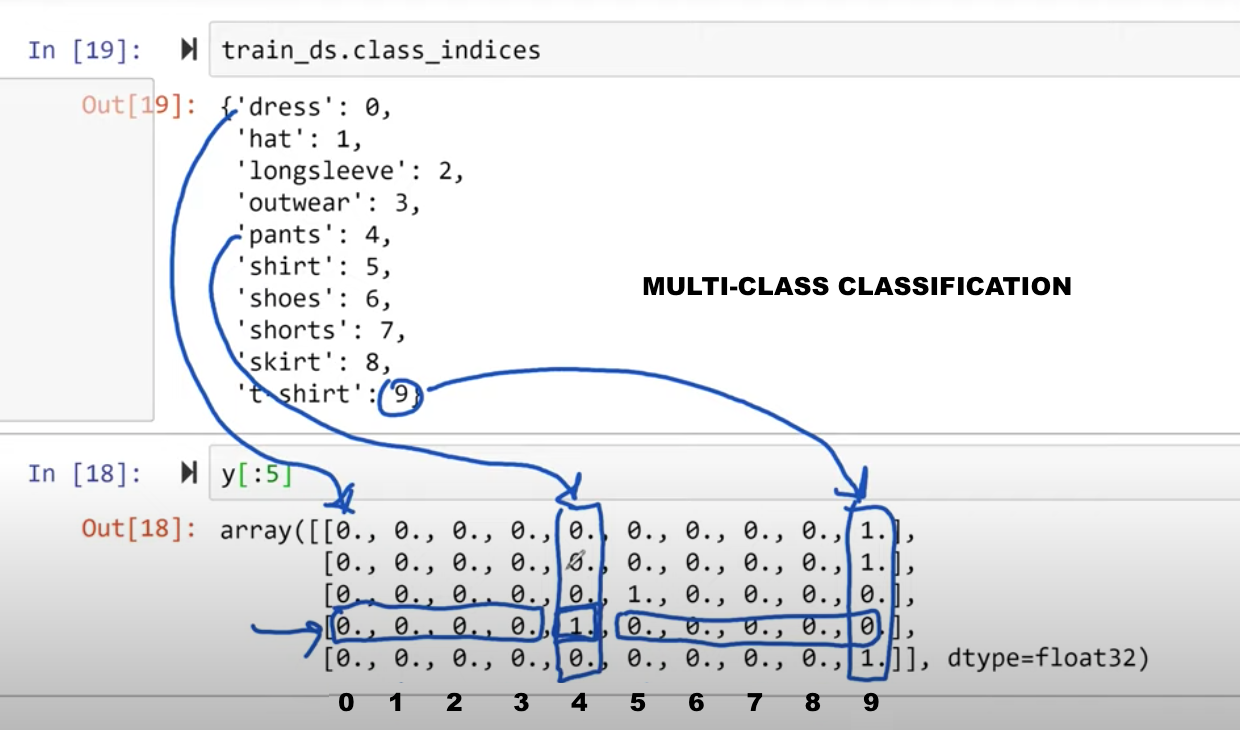

* One hot encoding label method we applied to our target variable this is how we usually do multi-class classification.
* Labels that we have it used one hot encoding for the labels for example in this column we have t-shirt index number nine so here we have t-shirt you know for example the first one is dress we don't have any addresses here so this one is zero, one, two, three, four, five, seven, eight, nine so the fourth one is pants this arrow row here has label pants and this is one hot encoding so it has one for pants and the zero for the rest this is the same one hot encoding method but applied to your target variable this how we usually do multi-class classification and you can also think of this as ten different binary variables so this one, four say if this the observation zero if this is not pans and one if it spends and then we have just ten different variable ten different binary variable and then we sort of fit ten different models even though we actually fit only one but you a conceptually think as if were fitting ten different binary classification models and each is predicting it's a dress or not dress and then if it pants or not pants or if it's a t-shirt or not that you should this how our data looks like.

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


* We can do the same for validation we just put it into one cell then we execute it and it says that if found 341 images from 10 classes so the same ten classes we had previously, we know how to read the data, now let's train the model.

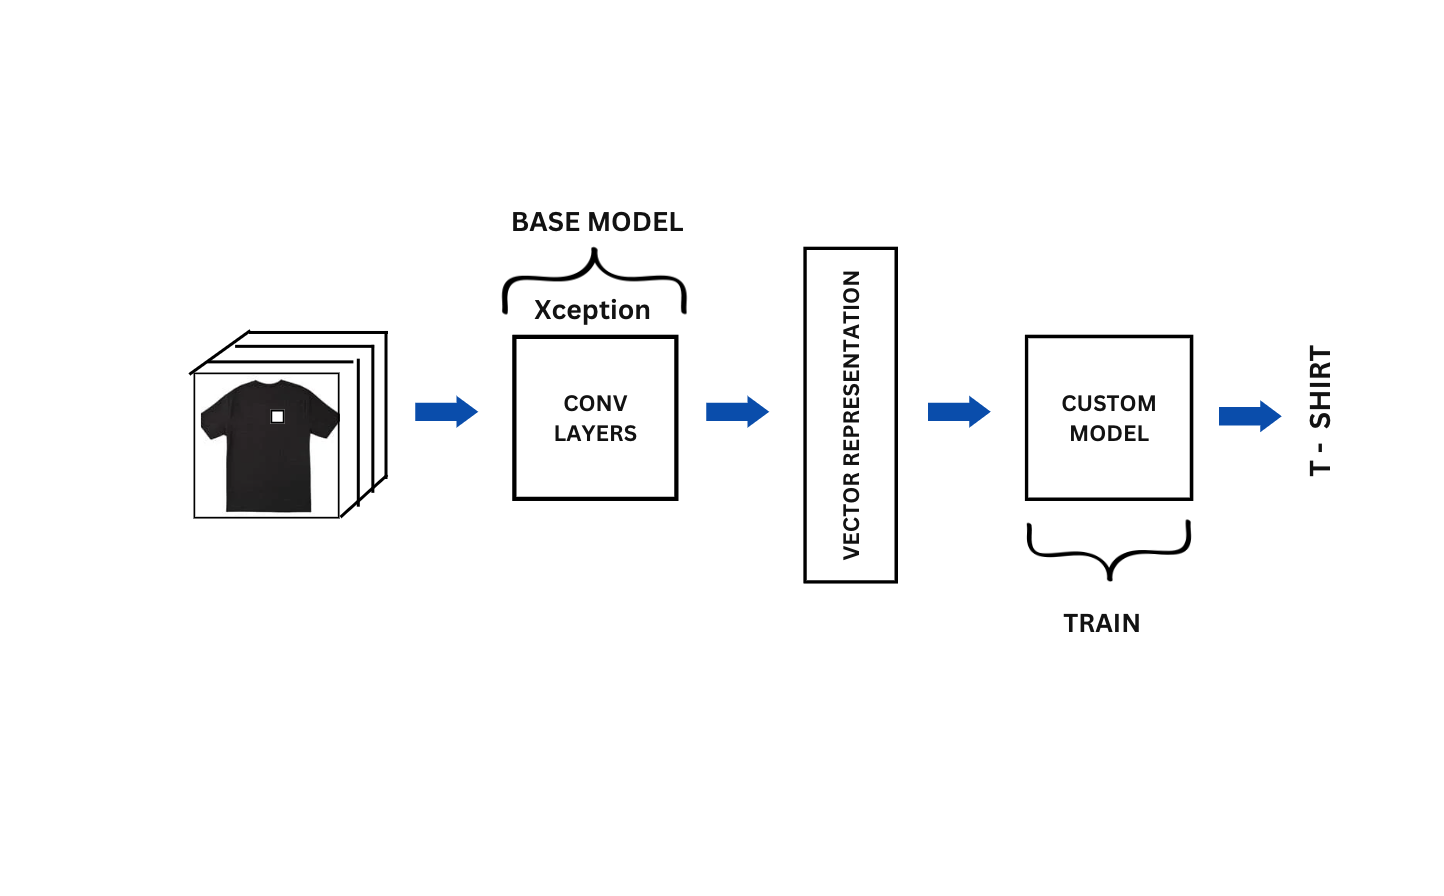

* Then we'll train our custom model on top of that and then this will have ten classes of t-shirts the base model in our case is an exception to extract the feature representation from the images and then we will train the rest.

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

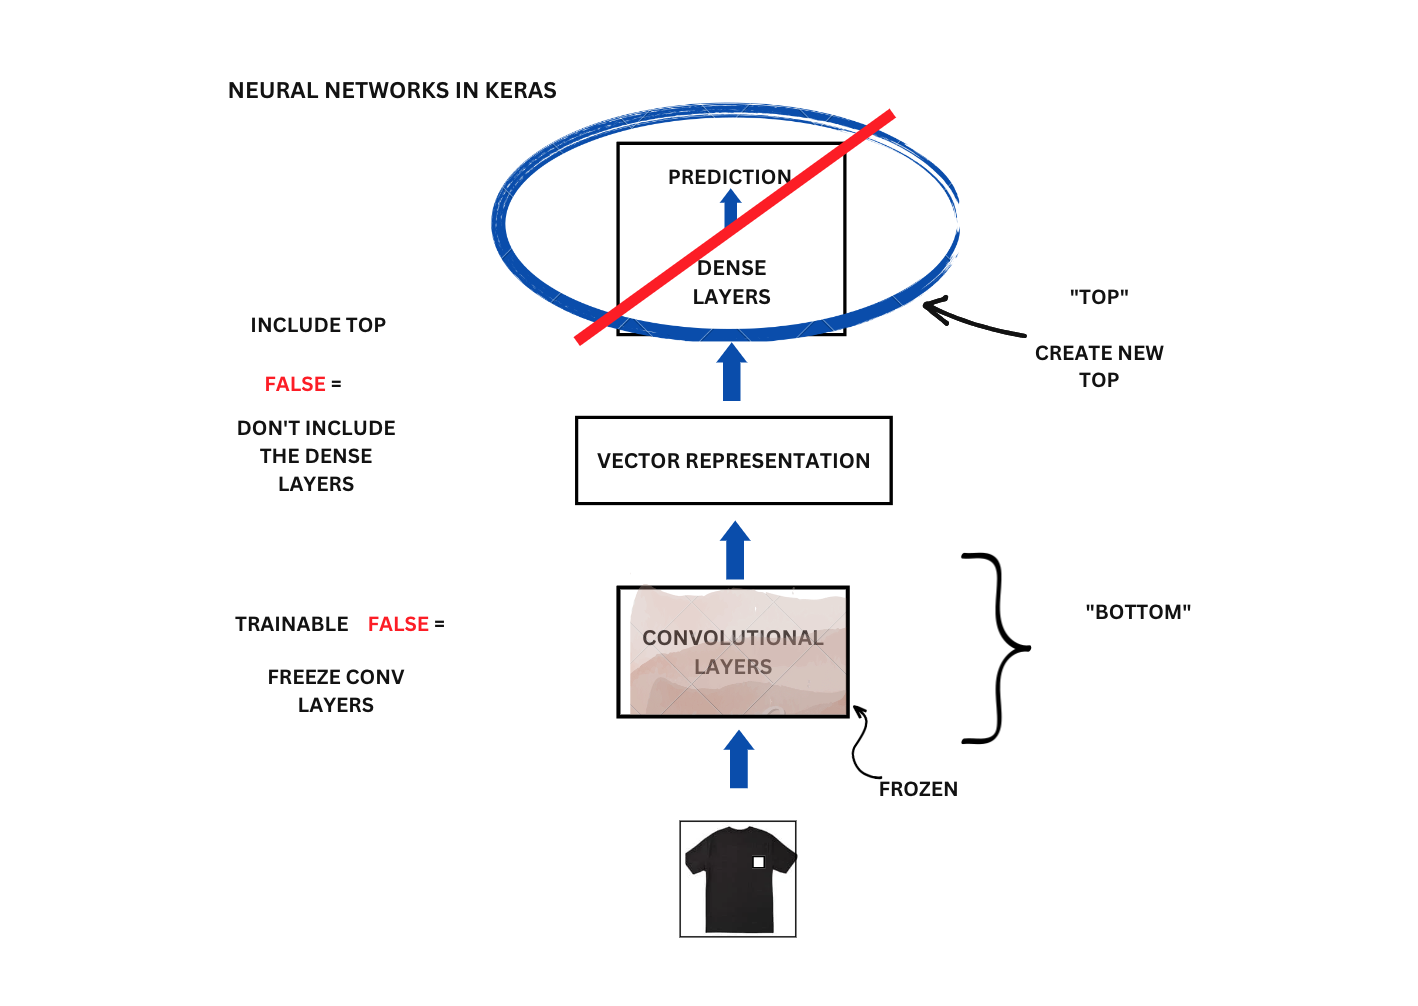

* We need to specify the input so-called inputs this is the part of the model that will receive the image input here we know the shape is 150 by 150 by 3. I think it's a bit redundant but we need to repeat it, this input goes to the base model this is the input t-shirt and it goes to our base model. 

* So this is inputs and actually remember that this inputs is a batch so this is 150 by 150 by 32 and then there are of course three channels as well so this is our input.

* Inputs go to our base model and we use our base model to extract this vector representation to the base model and then we apply the base model to inputs this way we say we want to use the base model on inputs and then whatever is output will be called the base.
* We apply a base model here and we get something that we call base you can take a look at what exactly is there.

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


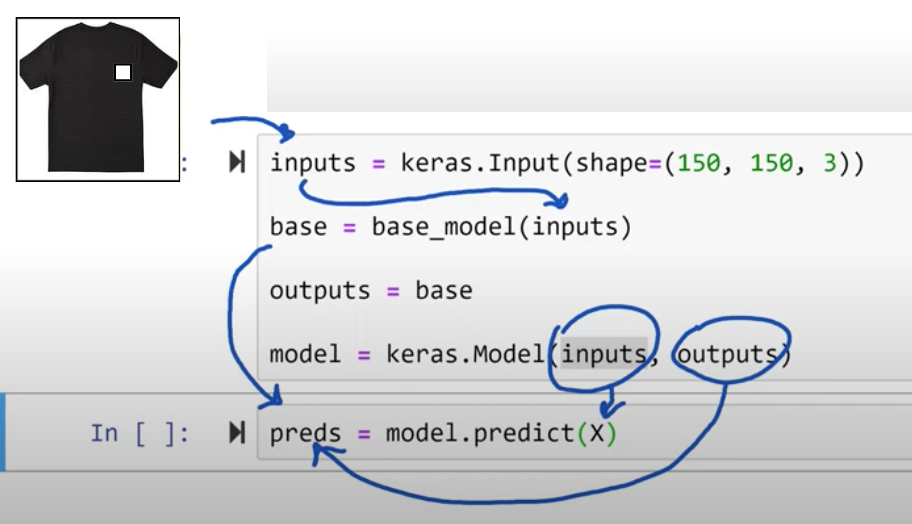

* Let's do that for that we now need to drop everything into called keras model so let me just say this is the final output of the model I'll just say the base is the final output then I'll create a model keras and then here I need to specify inputs and outputs so inputs this is what where we fit in the data and output this is what we get when we call predict model, predict and so we in predict we pass output and the predictions is so this input is this X and outputs is what goes here **preds** so it goes this way  this X or X goes here and actually remember that our X is a picture of let's say t-shirt so it goes to inputs then from inputs it goes to base model and the from the base model, this base goes to the predictions.


In [ ]:
preds.shape

(32, 5, 5, 2048)

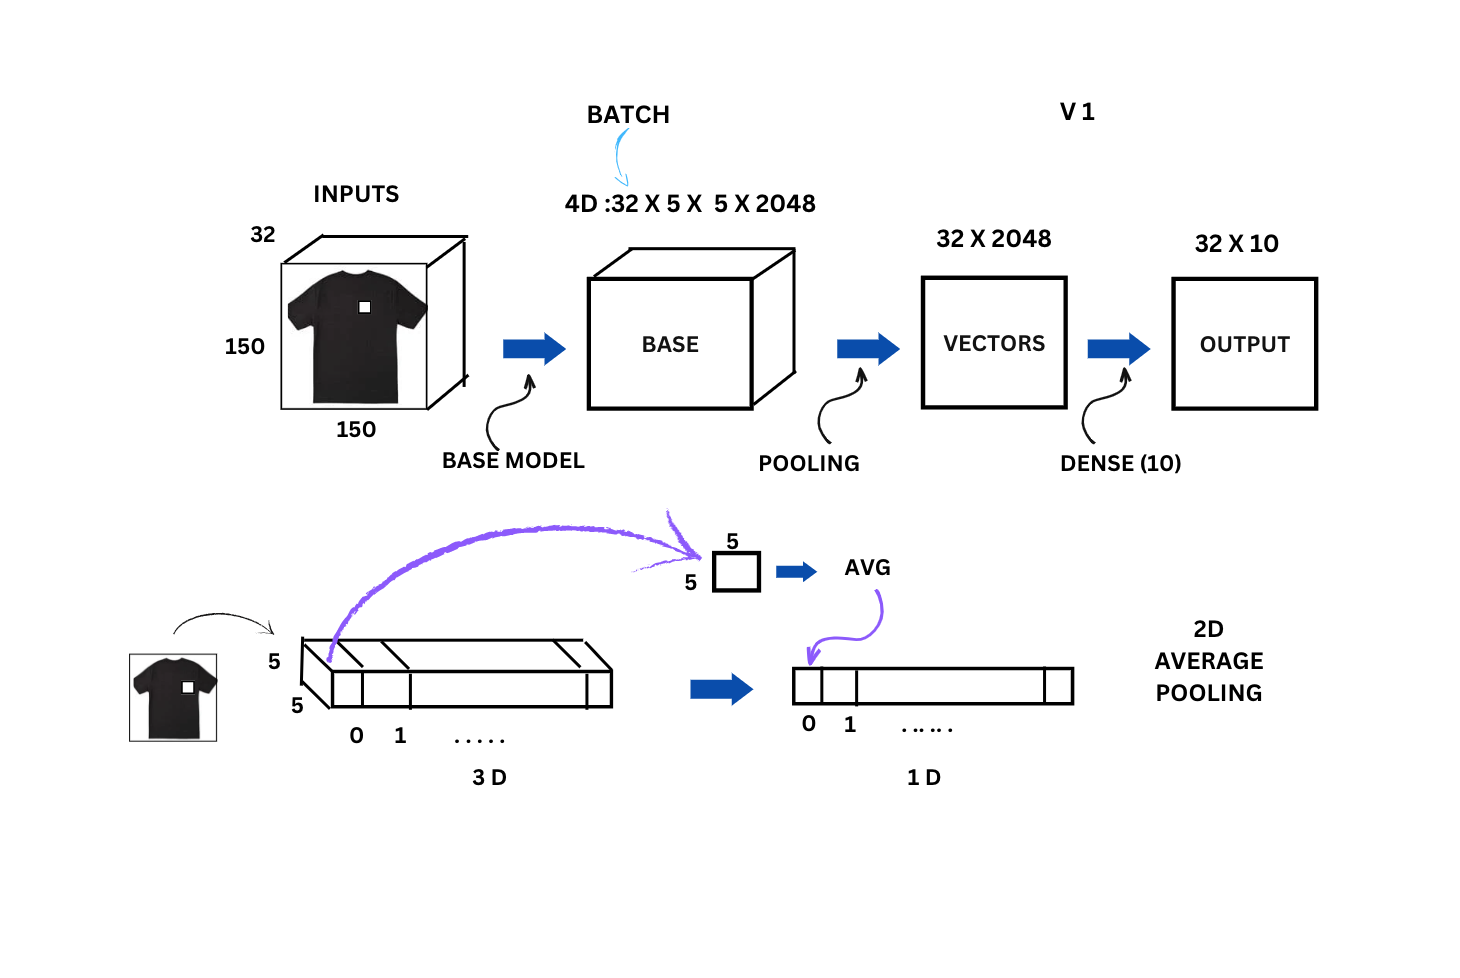

* It's a four- dimensional thing the shape is 32 by 5 by 5 by 2048 this one is actually the size of the watch if we think about this actually the right way of drawing this would be this very long thing and if we talk about just one image. t-shirt it goes in not 32 images but just one so it passes through convolutional neural network a bunch of convolutional layers and that what we get at the end is a thing that has size 5 by 5 by 2048 so this doesn't look like vector representation yet, because it's actually a three dimensional so it turn it into something one dimensional and use that as the vector representation so we will have something that takes in what we call base and turns it into a bunch of vectors.
* We try to look at this long three-dimensional thing and we can just sort of chunk it slice it like for every single layer here so this is one this is here and so on up to the very last one each of this thing.
* We can so like let's the first one take a look at this is a  five by five thing so what we can do is we can take the average of this thing and put it in our one-dimensional thing and we can do it for every such chunk so we kind of slice it and take our average and then put it in our vector representation then it's again zero one and so on up to the last one and this separation when we take something three-dimensional or two-dimensional and represented it in a smaller dimensionality it's called pooling in this particular case we need average pooling because we take an average of each of these squares and because we turn a three- dimensional thing into the one-dimensional thing we take like a two-dimensional chunk here a square and take average it's called two-dimensional average built-in Keras.

In [ ]:
inputs = keras.Input(shape =(150,150,3))

base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = vectors

model = keras.Model(inputs, outputs)



In [ ]:
preds = model.predict(X)

1/1 [==============================] - 1s 652ms/step


In [ ]:
preds.shape

(32, 2048)

* This thing for pooling gives them these layers it's called global average pooling 2d let's call it pooling.
* So we apply this pooling to the base and we get back the vector and then our vectors would be the output, what happens here is our input then it goes here to the base model and our base is a four-dimensional thing or in the case of a single image it's a three-dimensional thing like this long and we want to turn it into the one-dimensional thing we do it by pooling this base goes here and so this is a base and this is vector and now the vector is output so it goes here meaning that we will get them in predictions now

* So now the shape we have is 32 by 2080 to our 2048 meaning that we managed to shrink this into a one-dimensional vector for each of the images now let's call it pooling.
* this way of building a neural network is called functional style so we use these building blocks as functions.
* So even now we have these vectors, now we want to have a dense layer on top of that to turn the vector into predictions so what we want to have at the end is an array 32 by 10 with their predictions so I'll call it output because this is actually what we want to output and dimensionality of this thing is 32 by 2048 and then all these cases 32 is the size of our batch and here for turning vectors into outputs we want to create a dense layer.

* Keras layers dense and there are ten classes so that's why it's ten it's why we have ten here as well because there are ten different classes so we habe ten and then the input to the dense layer is vectors and if we execute that now the predictions will be 32 by 10 into.

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 [==============================] - 1s 672ms/step


In [ ]:
preds.shape

(32, 10)

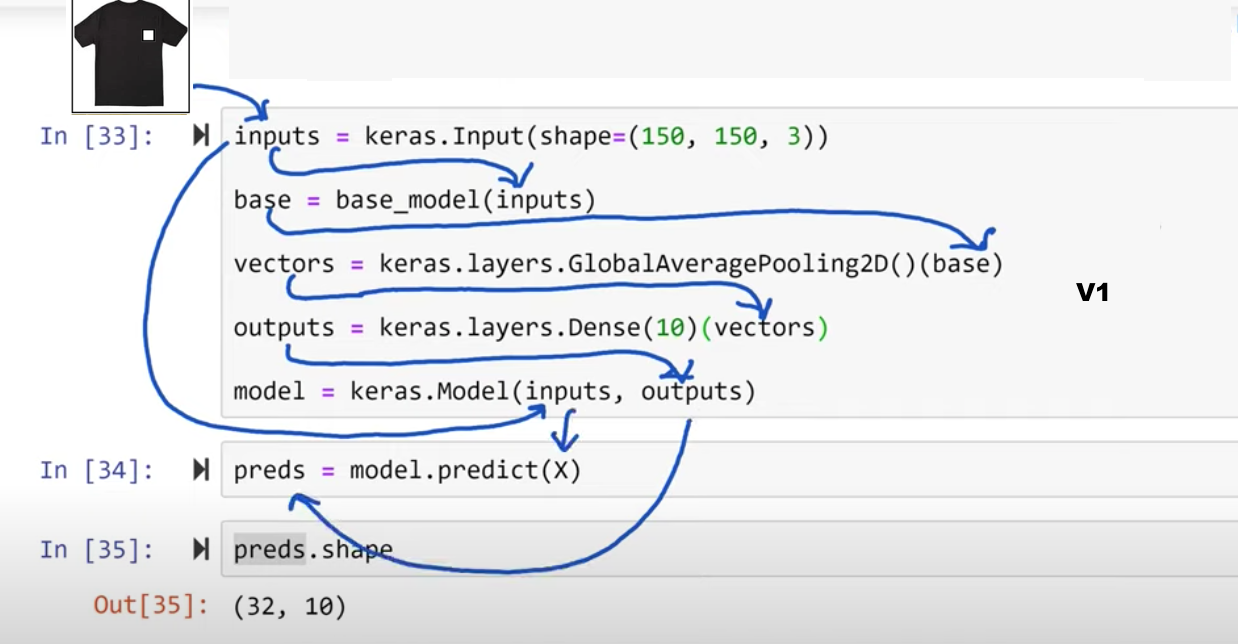

* Input is our t-shirt it goes here then from there and goes to our base model based model takes this as input and produces this three-dimensional long thing then from this long thing we pool it we turned it into the one-dimensional vector by using pooling and then this gives us our vector representation than from this vector representation we add a dense layer to turn the vector present representation into predictions and the dimensionality of this is 10 because we have ten classes and then this is finally what goes to the output of the model so input is here and the output is what we will have when we invoke predict and the input is the X so let's call this model version 1.

In [ ]:
preds

array([[ 2.96940152e-02, -3.83411527e-01, -8.00602883e-02,
         3.59653354e-01,  4.03953493e-01, -1.28317386e-01,
        -1.04607975e+00,  3.83159220e-01,  4.38399971e-01,
        -3.47421356e-02],
       [ 3.44117075e-01,  5.08684278e-01, -3.07169527e-01,
         1.07879028e-01,  9.61459875e-02, -7.87689164e-03,
        -2.71860361e-01,  5.99234030e-02,  1.33719265e+00,
         7.85173416e-01],
       [ 2.59018898e-01,  1.46618330e+00,  4.53843623e-01,
        -3.97110581e-01,  4.44421113e-01, -2.87480980e-01,
         5.31764090e-01,  1.53249383e-01,  2.30139196e-01,
        -1.43087029e-01],
       [-6.82990476e-02,  1.11244714e+00,  1.21674037e+00,
        -3.43974888e-01, -4.50489298e-02,  4.70150381e-01,
         2.98596323e-02, -8.53284746e-02,  9.72986102e-01,
         4.07601058e-01],
       [-3.13624255e-02,  3.94106507e-01,  1.73535943e-01,
         8.71428847e-01, -3.72343510e-03,  3.87650877e-01,
         1.62233040e-01, -4.71603051e-02,  7.56375670e-01,
         6.

* But now when we do model predict this outputs some nonsense.

In [ ]:
preds[0]

array([ 0.02969402, -0.38341153, -0.08006029,  0.35965335,  0.4039535 ,
       -0.12831739, -1.0460798 ,  0.38315922,  0.43839997, -0.03474214],
      dtype=float32)

* If we take a look at this it just produces some numbers but of course use, we haven't trained the model yet that's why this is just random things because this layer when we create it it's initialized with just random numbers that are why the prediction is also just a bunch of random numbers.


* First we need is optimizer so this is the thing that finds the best weights for the model.
* These weights need to be trained in how we do this by changing each element of this matrix and then seeing if it leads to a better solution or not we do this many many times the thing that is doing that changing the weights.

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

* Use adam and it has one it has probably multiple parameters but the important one for us is the learning rate of 0.01 let me just create a variable here learning rate so this is similar to eta in the case of boost we'll talk about tuning this parameter.
* We'll just use this value and see what happens this is our optimizer then the optimizer needs to know how exactly it needs to change the weights so how does it check that if it changes the weights if the results are better?
* Matrix so Keras the losses leaf and losses package and we see that there are a few of them for our case since we use it's a multi-class classification problem we use categorical cross entropy for binary classification we would use binary cross entropy and then it we are solving the regression problem we would use mean squared error remember, we talked about mean squared error which is a way of evaluating regression models so categorical cross entropy is a way of evaluating classification models in particular multi-class classification models so it just outputs a number that is the lower the number the better and optimizer is trying to optimize this number it's trying to make it as low as possible and it's doing this by changing different values of our parameters so this matrix w is parameter of the dense layer you can have many different dense layers each of which has its parameters so the optimizer is changing them and it uses this categorical cross entropy to make sure it's improving things so this will be our loss for this loss there is one interesting thing this is parameter forum logits equal false so we need to change it to true and the reason for that will go if we check the docs this argument from logit whether y prediction is expected to be a logit tensor and it says node using logic's true may be more numerically stable so the recommendation uses from logit stream like.

In [ ]:
#model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 20s 169ms/step - loss: 1.2632 - accuracy: 0.6662 - val_loss: 0.8808 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 14s 145ms/step - loss: 0.5925 - accuracy: 0.8191 - val_loss: 0.8494 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 15s 156ms/step - loss: 0.3402 - accuracy: 0.8820 - val_loss: 1.0088 - val_accuracy: 0.7683
Epoch 4/10
96/96 [==============================] - 14s 146ms/step - loss: 0.2296 - accuracy: 0.9179 - val_loss: 0.7514 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 15s 156ms/step - loss: 0.1525 - accuracy: 0.9462 - val_loss: 0.9032 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 14s 146ms/step - loss: 0.1382 - accuracy: 0.9518 - val_loss: 0.7863 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 15s 155ms/step - loss: 0.0917 - accuracy: 0.9651 - val_loss: 0.9979 - val_accuracy: 0.7918

* We use the fit method so we pass our train to the source then we say for how many epochs we want to run so one epoch we go over the **dataset** for.

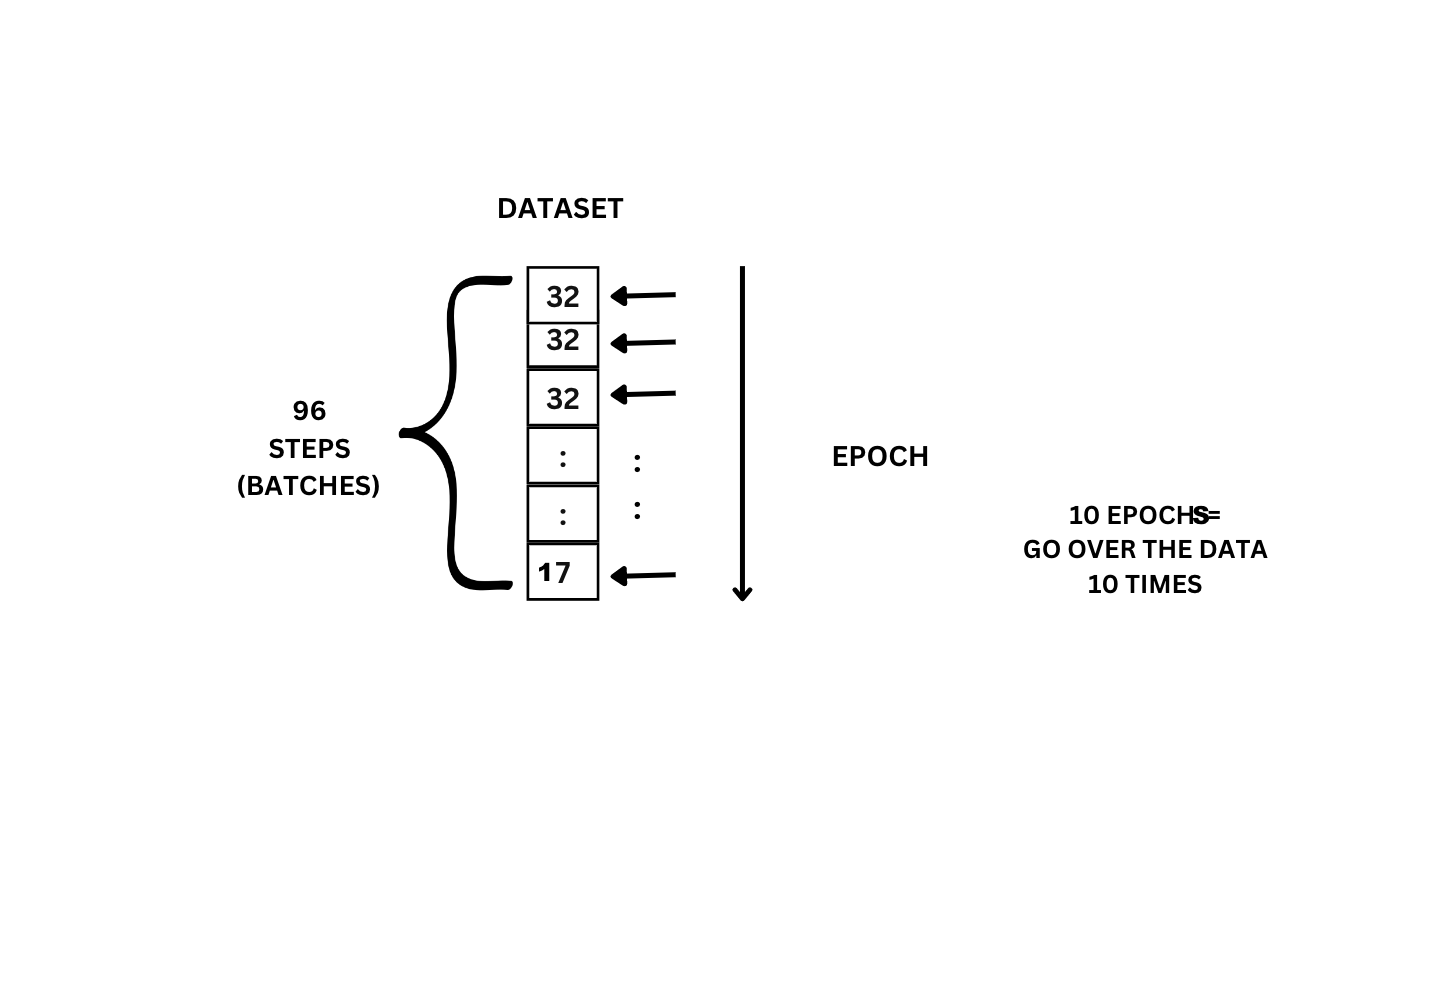

* So let's say we have our dataset and our dataset consists of batches of 32 images each or that last one is not necessarily 32 it can be I don't know 17, it doesn't matter all of them are 32 except the last one because there could be fewer images when we train the model we usually apply to one batch at a time so we fit a model on this batch then on this one and this one this is like one iteration and when we do it once it's called epoch than when we say we want to have 10 epochs it means to go over the data 10 times.

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 164ms/step - loss: 1.2363 - accuracy: 0.6705 - val_loss: 0.7644 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 15s 151ms/step - loss: 0.5355 - accuracy: 0.8312 - val_loss: 0.7463 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 15s 152ms/step - loss: 0.3568 - accuracy: 0.8765 - val_loss: 0.8138 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 14s 144ms/step - loss: 0.2462 - accuracy: 0.9195 - val_loss: 0.8911 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 14s 146ms/step - loss: 0.1909 - accuracy: 0.9348 - val_loss: 0.9683 - val_accuracy: 0.7742
Epoch 6/10
96/96 [==============================] - 15s 154ms/step - loss: 0.1486 - accuracy: 0.9501 - val_loss: 0.9548 - val_accuracy: 0.7859
Epoch 7/10
96/96 [==============================] - 14s 146ms/step - loss: 0.1137 - accuracy: 0.9570 - val_loss: 1.0786 - val_accuracy: 0.7918

In [ ]:
history.history

{'loss': [1.2363238334655762,
  0.5355236530303955,
  0.35675808787345886,
  0.24624712765216827,
  0.19093501567840576,
  0.14860916137695312,
  0.11374188959598541,
  0.09485124051570892,
  0.043276697397232056,
  0.029165584594011307],
 'accuracy': [0.670469343662262,
  0.8311603665351868,
  0.8764667510986328,
  0.9194915294647217,
  0.9348109364509583,
  0.9501304030418396,
  0.9569752216339111,
  0.9677314162254333,
  0.9882659912109375,
  0.9944589138031006],
 'val_loss': [0.7643774747848511,
  0.7462709546089172,
  0.8138269186019897,
  0.8911347389221191,
  0.9683341383934021,
  0.954767107963562,
  1.0785562992095947,
  0.9399444460868835,
  0.8807587623596191,
  0.9220870733261108],
 'val_accuracy': [0.7653958797454834,
  0.803519070148468,
  0.8064516186714172,
  0.8064516186714172,
  0.774193525314331,
  0.7859237790107727,
  0.7917888760566711,
  0.8064516186714172,
  0.8123167157173157,
  0.8093841671943665]}

In [ ]:
history.history['accuracy']

[0.670469343662262,
 0.8311603665351868,
 0.8764667510986328,
 0.9194915294647217,
 0.9348109364509583,
 0.9501304030418396,
 0.9569752216339111,
 0.9677314162254333,
 0.9882659912109375,
 0.9944589138031006]

In [ ]:
history.history['val_accuracy']

[0.7653958797454834,
 0.803519070148468,
 0.8064516186714172,
 0.8064516186714172,
 0.774193525314331,
 0.7859237790107727,
 0.7917888760566711,
 0.8064516186714172,
 0.8123167157173157,
 0.8093841671943665]

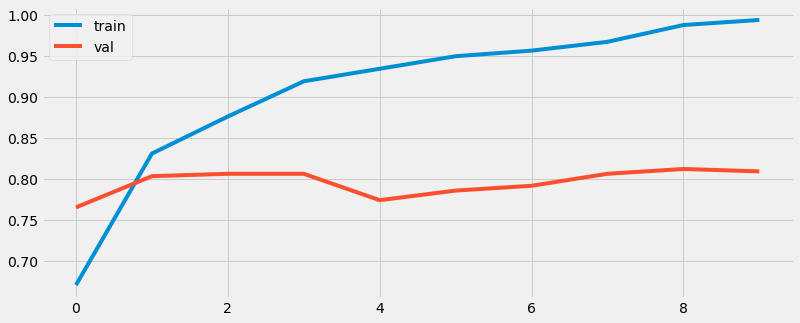

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

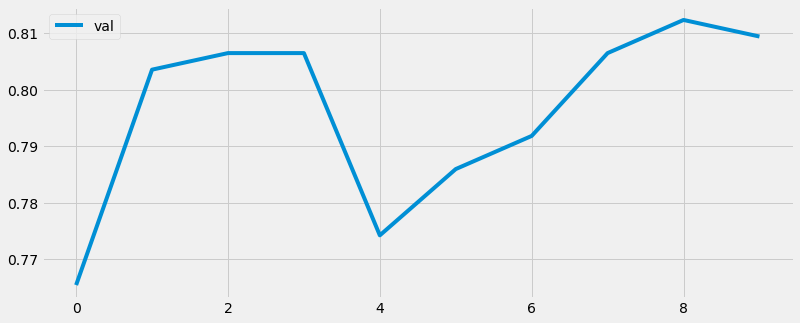

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

* For training it goes it almost reaches one, so lets remove it for validation it quickly reaches this 80 percent, and then for the rest of the iteration it just oscillates around 80 sometimes it jumps quite high, and then it goes down so it will probably keep jumping it we train it for 100 and maybe at some point it will go down because clearly, our network is overfitting it behaves actually after one iteration.
* It's good but just seems like a random fluctuation and I'm not sure if it's significant because that accuracy for on-train was already like probably 95 percent or something like this so this one is probably overfitting.
* Good model achieved 81 percent accuracy approximately.

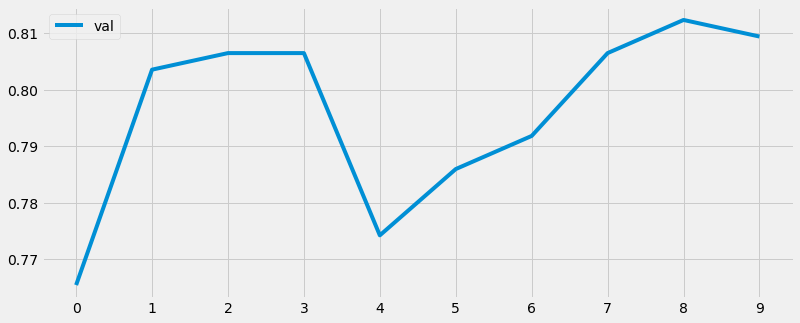

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## **8.6 Adjusting the learning rate** (video 6)

* What's the learning rate
* Trying different values

* To tune and adjust the learning rate and see which one is good a good way of thinking about, learning rates to use this analogy imagine that learning rate is how fast you can read 

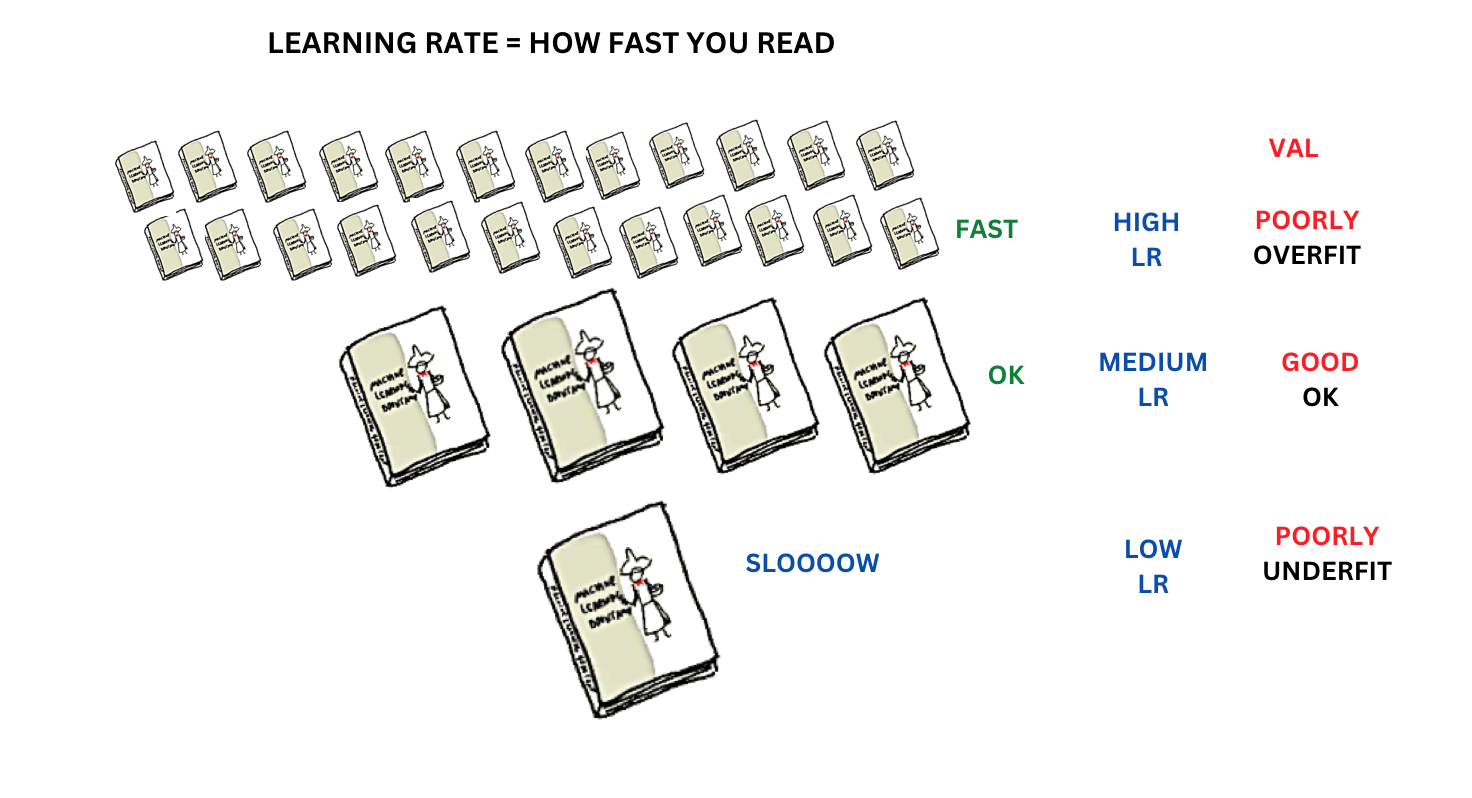

* So let's say you have a book and you want to read this book so a learning rage tell how fast you read it let's say you did one book per quarter then one year you would read four books or alternatively you can read a lot of books very fast let's say you read one book per day then one year you can read like a lot of books but if your read so many of them maybe you're just skimming through them and looking at table of contents or just flipping the book through and then looking at the concepts you try to apply what you learned in these books you do'nt remember much well if you just read four books per year then for you it's easier to apply and then the other case we can think about is read just one book per year and you read it very slow maybe you take  notes then you copy every words into your notebook and then you make sure your remember everything so then you will learn this book really really well by the end of the year and if this is high learning rate you read a lot of books but very fast then for books per year is medium, it's not like you're rushing through books but you're also not learning a lot of them and then although a learning rate would be just one book per year and really really really slowly copying everything the last one is effective presumably but it's very slow like you're not making much progress you're reading everyday maybe one page only and it's just too slow so this one maybe speed maybe not super impressive but you're not in a hurry you're taking your time to learn and this is just too fast and when you try  to apply what you learned or maybe in this case what you learned was really superficial you did'nt really learn a lot a and maybe you forget what you learned in the first book when you already read the second so when you get tested then you don't really do well if we think about this as training and validation so this past would be reading his training and then applying what he learned would be validation and then you would do poorly on validation in this case but in this cas you'll do fine and in the last case when you try to apply what you learned maybe you will also do pooly because in this year you managed to read only one book and if maybe the task you get is not in this book right and then you also do poorly and actually this book is good if you read it then you will do well but just for the sake of example so in case of learning rate too high you overfit you did a lot of things but you forget in case of one book per year you under fit so yo could have learned faster and then with good enough with medium learning rate it's okay so this is how you can think of learning rate it aslo applies to neural networks and to creating boosting into other machinery models and it's important to find the right balance.
* If we set the learning rate too high we risk overfitting if we set it too low we will be too slow and it will just take forever to learn anything so we need to find the sweet spot the right balance between learning fast but not too fast and not too slow, we do it in the same way as we did with gradient boosting so we just try different parameters and look at slots and try to see which one works best.

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 18s 154ms/step - loss: 1.9490 - accuracy: 0.3455 - val_loss: 1.6117 - val_accuracy: 0.5044
Epoch 2/10
96/96 [==============================] - 15s 156ms/step - loss: 1.4073 - accuracy: 0.5580 - val_loss: 1.2616 - val_accuracy: 0.6158
Epoch 3/10
96/96 [==============================] - 14s 145ms/step - loss: 1.1587 - accuracy: 0.6379 - val_loss: 1.0802 - val_accuracy: 0.6862
Epoch 4/10
96/96 [==============================] - 15s 154ms/step - loss: 1.0128 - accuracy: 0.6776 - val_loss: 0.9736 - val_accuracy: 0.7302
Epoch 5/10
96/96 [==============================] - 14s 146ms/step - loss: 0.9177 - accuracy: 0.7063 - val_loss: 0.8909 - val_accuracy: 0.7566
Epoch 6/10
96/96 [==============================] - 14s 146ms/step - loss: 0.8464 - accuracy: 0.7282 - val_loss: 0.8380 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 15s 154ms/step - loss: 0.7926 - accuracy: 0.7461 - val_loss: 0.8033 - val_accuracy:

In [ ]:
for lr, hist in scores.items():
  print(lr)
  print(hist)


0.0001
{'loss': [1.94895339012146, 1.4073231220245361, 1.1587085723876953, 1.0127694606781006, 0.9176611304283142, 0.846387505531311, 0.7925559878349304, 0.7489564418792725, 0.7129030227661133, 0.6820139288902283], 'accuracy': [0.34550195932388306, 0.5580182671546936, 0.6378748416900635, 0.6776401400566101, 0.7063233256340027, 0.7281616926193237, 0.7460886836051941, 0.7565189003944397, 0.7685788869857788, 0.7777053713798523], 'val_loss': [1.6116646528244019, 1.26157808303833, 1.0801548957824707, 0.9736430048942566, 0.8908807039260864, 0.8379626870155334, 0.8032592535018921, 0.7670902013778687, 0.7428010702133179, 0.7231516242027283], 'val_accuracy': [0.5043988227844238, 0.6158357858657837, 0.6862170100212097, 0.7302052974700928, 0.7565982341766357, 0.7683284282684326, 0.7771260738372803, 0.7947214245796204, 0.7947214245796204, 0.803519070148468]}
0.001
{'loss': [1.0856928825378418, 0.6243979334831238, 0.5095587968826294, 0.42528972029685974, 0.372219443321228, 0.32475894689559937, 0.29

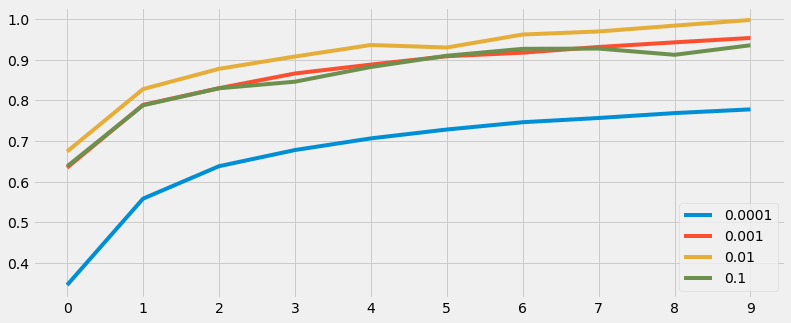

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=(lr))

plt.xticks(np.arange(10))
plt.legend()


* We try to look at the accuracy, so this one is green right so actually for some reason the green one (0.01) gets the best accuracy on the training dataset I'm not sure why this one red(0.1) is lower so I would expect this one would go like that I don't know why it's not but this one this blue(0.0001) small learning rate is like after 10 iterations only reached 80 percent on training.

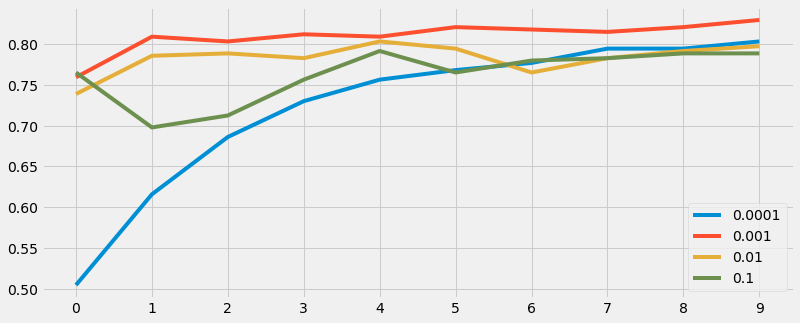

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(lr))

plt.xticks(np.arange(10))
plt.legend()

* So now let's take a look at validation again this one learns too slowly this one blue(0.0001) after 10 iterations so it gives up quite steadily but then after 10 iterations still around 75 percent well this model is orange(0.001) is more than 80 percent now remove this blue(0.0001) and look at just these three you can also drop this one because it's worse from all these four it's worse so let's just keep these two to do that I'll simply delete from scores.

In [ ]:
del scores[0.1]
del scores[0.0001]

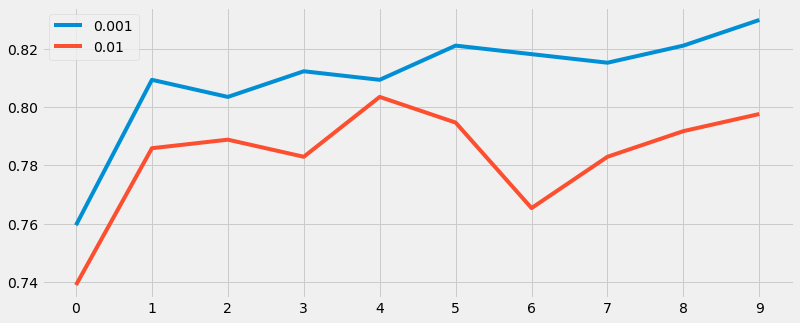

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(lr))

plt.xticks(np.arange(10))
plt.legend()

* The one hare blue(0.001) didn't get lucky but in general, it's always, always is better it's just in one single case it's not but in all other cases it is better which tells us that this model is actually with this(0.001) learning rate should be better.

In [ ]:
learning_rate = 0.001

* 0.001 two zeros and this is how we select the learning rate so we try different values we train the model and then we see which one is based on the validation data.

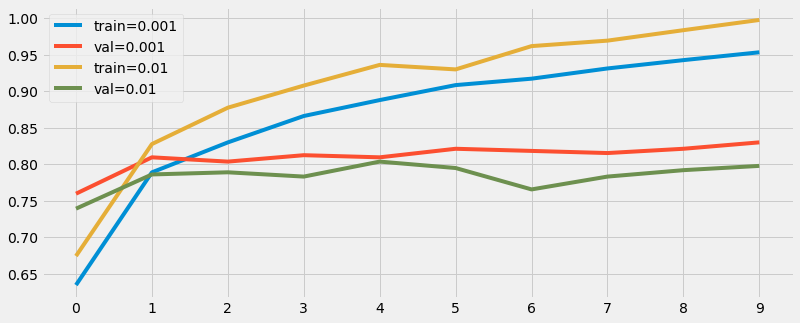

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

* These two train = 0.01 and val = 0.01 so not only it's worse on validation it's also better on training so there's a gap between these two and these train = 0.001 and val = 0.001 these two are bigger I think that's another argument in favor of actually going with this learning rate so this is how we select the learning rate.

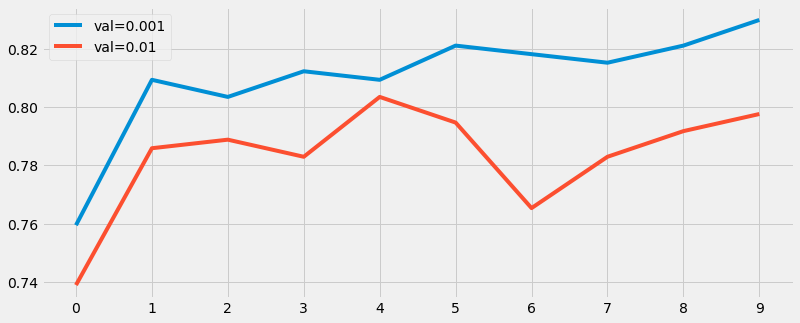

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## **8.7 Checkpointing** (video 7)

* Saving the best model only
* Training a model with callbacks

* Checkpointing is a way of saving our model after each iteration or when certain conditions are met, for example when the model achieves the best performance.

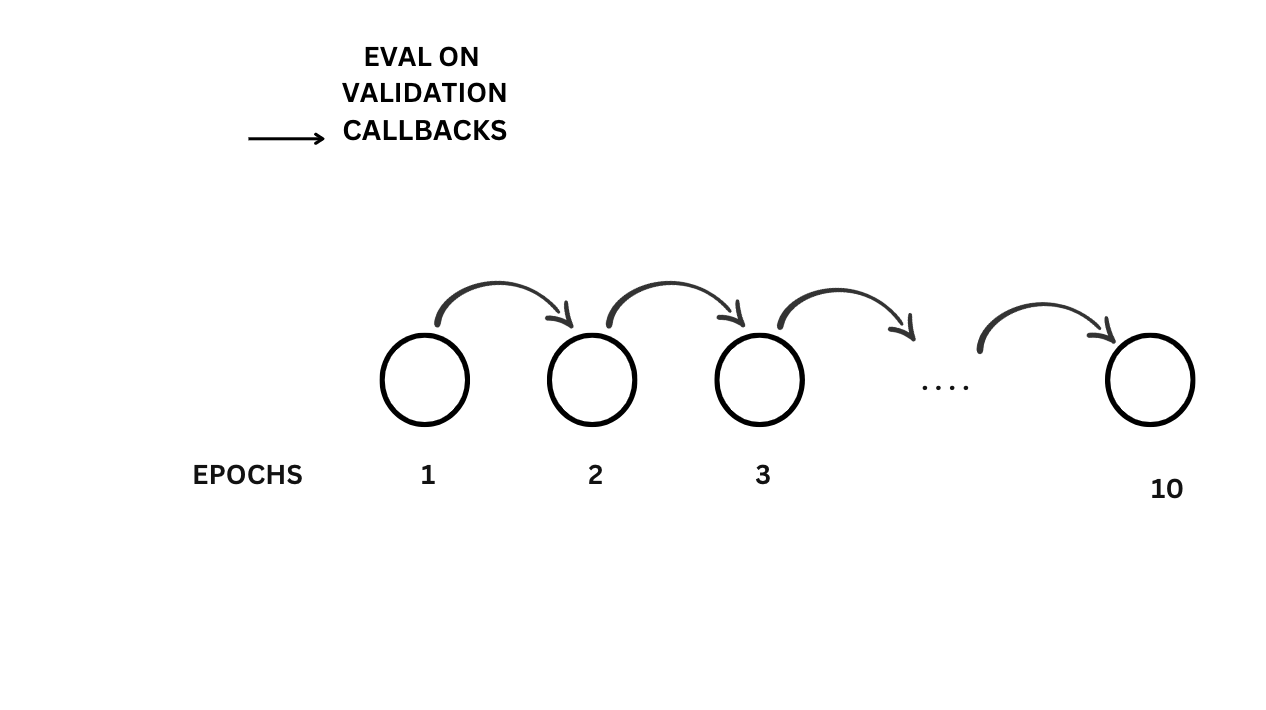

* Train our model for 10 epochs so first epochs second third to 10th, so when we train our model for one epoch what we do remember when we train our model at the end (epoch 8/10, 96/96) each epoch we evaluate the performances of the model on validation dataset and we do this after every epoch so we train it for one epoch for 96 iterations the after that, after one epoch is over we take the model we have and we apply it to validation and we do this after each book, what we can do with this is after we apply our model to validation and see what are the numbers we can invoke callback so this is callbacks we can just after the epoch is over we can do callbacks and do anything we want we're creating on validation it's also with all this information I think it is also implemented via the callback but we can add more things using this mechanism this is something some code we invoke after each epoch finishes in keras.

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'

'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'

In [ ]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3,val_accuracy=0.84)

'xception_v1_03_0.840.h5'

* This is the format we will use to save the models.
* 'xceptiong_v1_{epoch:02d}_{val_accuracy:3f).h5' to save the model using this template, things epoch and validation accuracy and this is a python way of formatting.

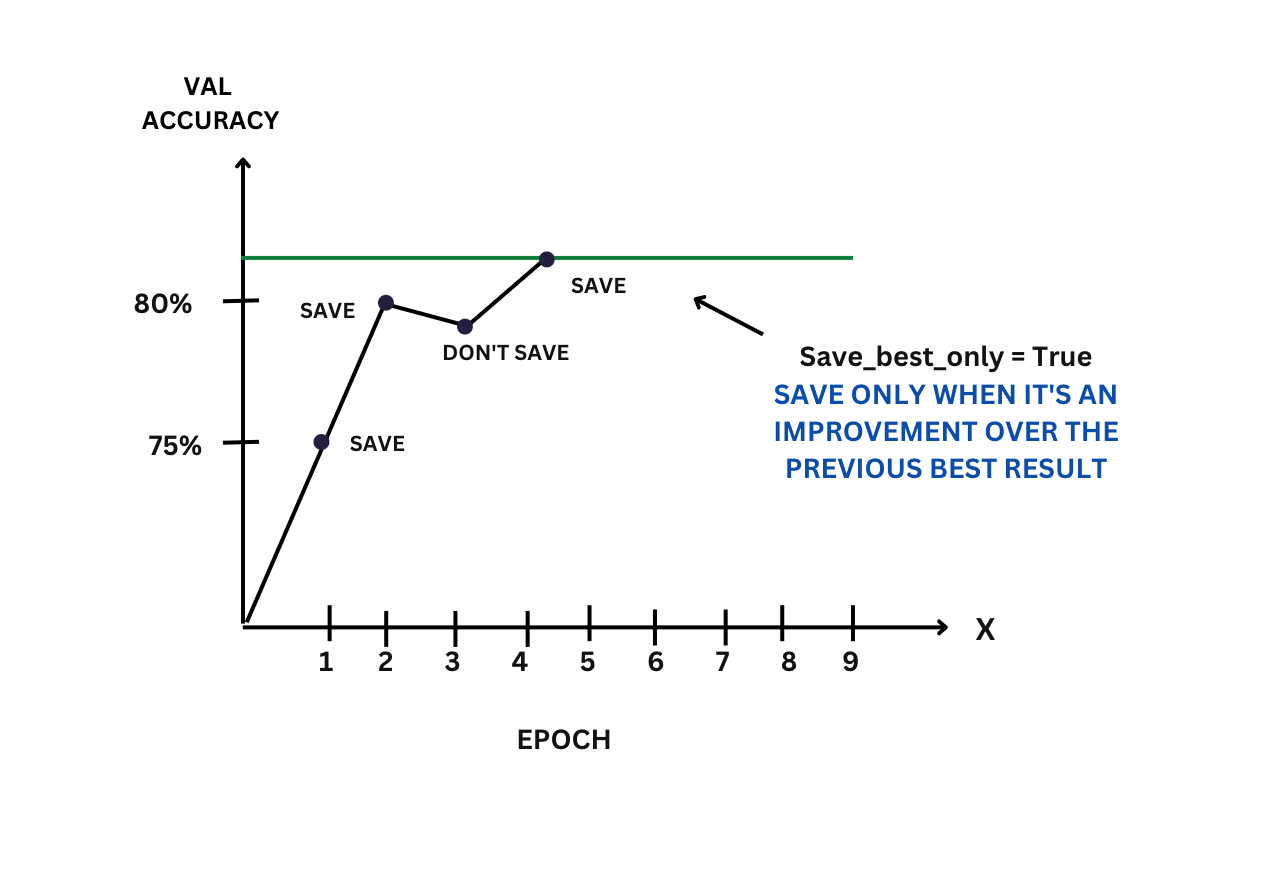

* Validation accuracy so after each epoch we evaluate our model and let's say for this one it's 75 percent and after this after one epoch say it's 75 precent it means that this is the best accuracy so far and if during the second iteration it's less then we don't care about this we only care about the results if it's more so let's say for second it will be 80 percent is actually better than 75 so then now 80 becomes the best one so we actually save this one after  the first situation so then 80 is improvement, so we save it and let's say if the next one is 79 then it's less than the previous best one then don't save it so we only save it if it's above the best one then if let's say for epoch four it's better and then it becomes the next best one we only saved the best one so this one is for (green line) for example if it's here then everything is worse than that we don't care and this is what we mean by safe guest only and I usually use that I don't want to save it after each iteration so if it's false then we save after each book but if it's true then we save it only when it's an improvement.

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

* So save best only is true and then we need to specify what kind of metric we actually monitor so far us it's validation accuracy and then the last thing we want to specify here is mode, so mode for us max because we want to maximize accuracy, so we want accuracy to be as high as possible but if it was a loss let's say root means cleared error it goes down so then we would be interested in minimizing here the mode is max we want to maximize and let's call this checkpoint so this callback is checkpoint.
* Gets a list of callback we have only one callback checkpoint we can just pass it.
* Make our model will the best learning rate and then we use the same code for training the model except we add a callback here.

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 19s 172ms/step - loss: 1.0976 - accuracy: 0.6402 - val_loss: 0.7120 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 14s 149ms/step - loss: 0.6372 - accuracy: 0.7806 - val_loss: 0.6211 - val_accuracy: 0.8152
Epoch 3/10
96/96 [==============================] - 14s 146ms/step - loss: 0.5092 - accuracy: 0.8328 - val_loss: 0.5923 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 15s 151ms/step - loss: 0.4324 - accuracy: 0.8660 - val_loss: 0.5731 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 14s 144ms/step - loss: 0.3750 - accuracy: 0.8827 - val_loss: 0.5624 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 15s 158ms/step - loss: 0.3268 - accuracy: 0.9113 - val_loss: 0.5294 - val_accuracy: 0.8328
Epoch 7/10
96/96 [==============================] - 14s 146ms/step - loss: 0.2903 - accuracy: 0.9198 - val_loss: 0.5415 - val_accuracy: 0.8240

* The learning rate we tuned so it achieves the accuracy of 83.6 so this is our best model in version 1 in parameter. 

## **8.8 Adding more layers** (video 8)

* Adding one inner dense layer
* Experimenting with different sizes of the inner layer

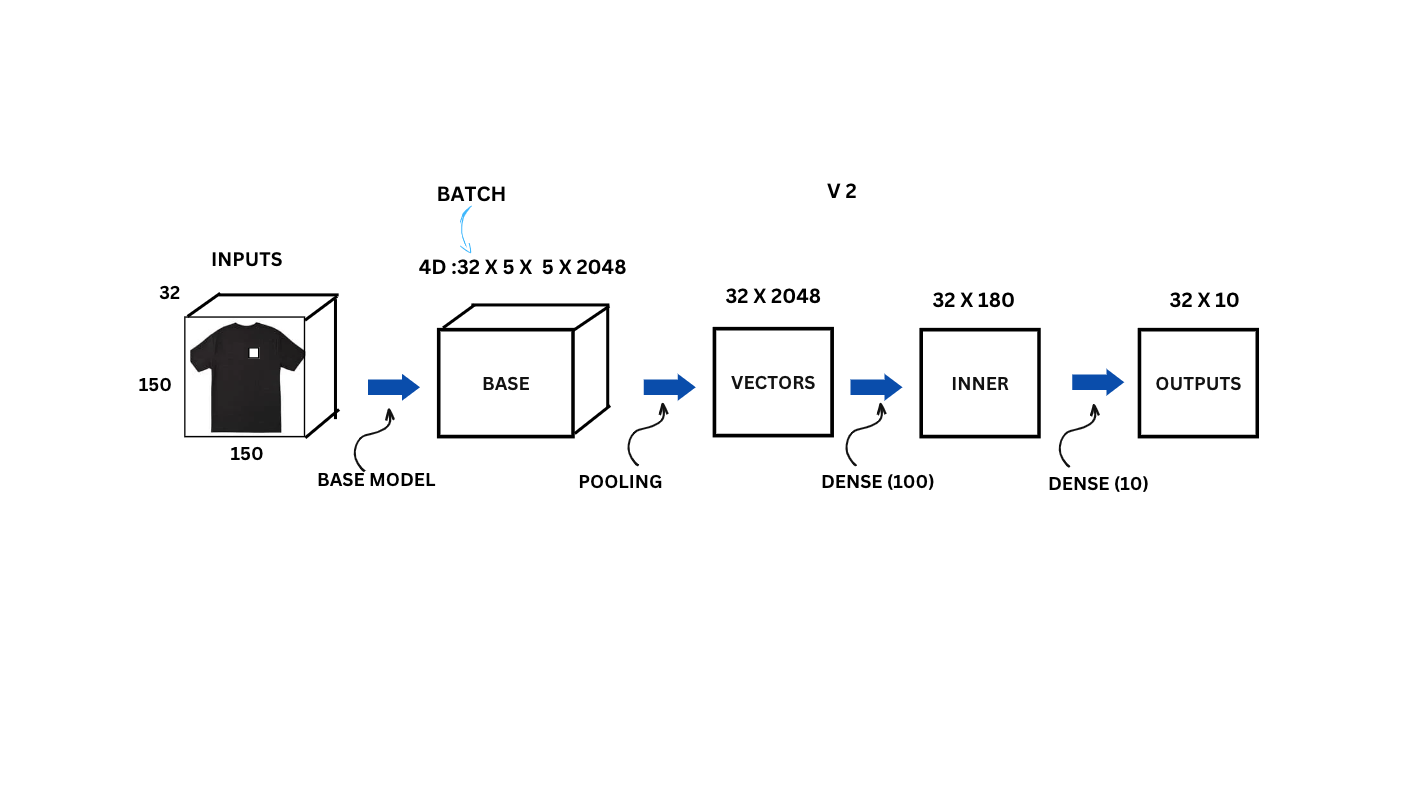

* So this is our dense layer so what we want to do now is we want to add one more layer.
* These dense there the way we transform vectors into this inner thing by using another dense layer (100) so the result for this transformation is then 32 by 100 and then we take the vector of size 100 and then we do the final transformation to get the output.

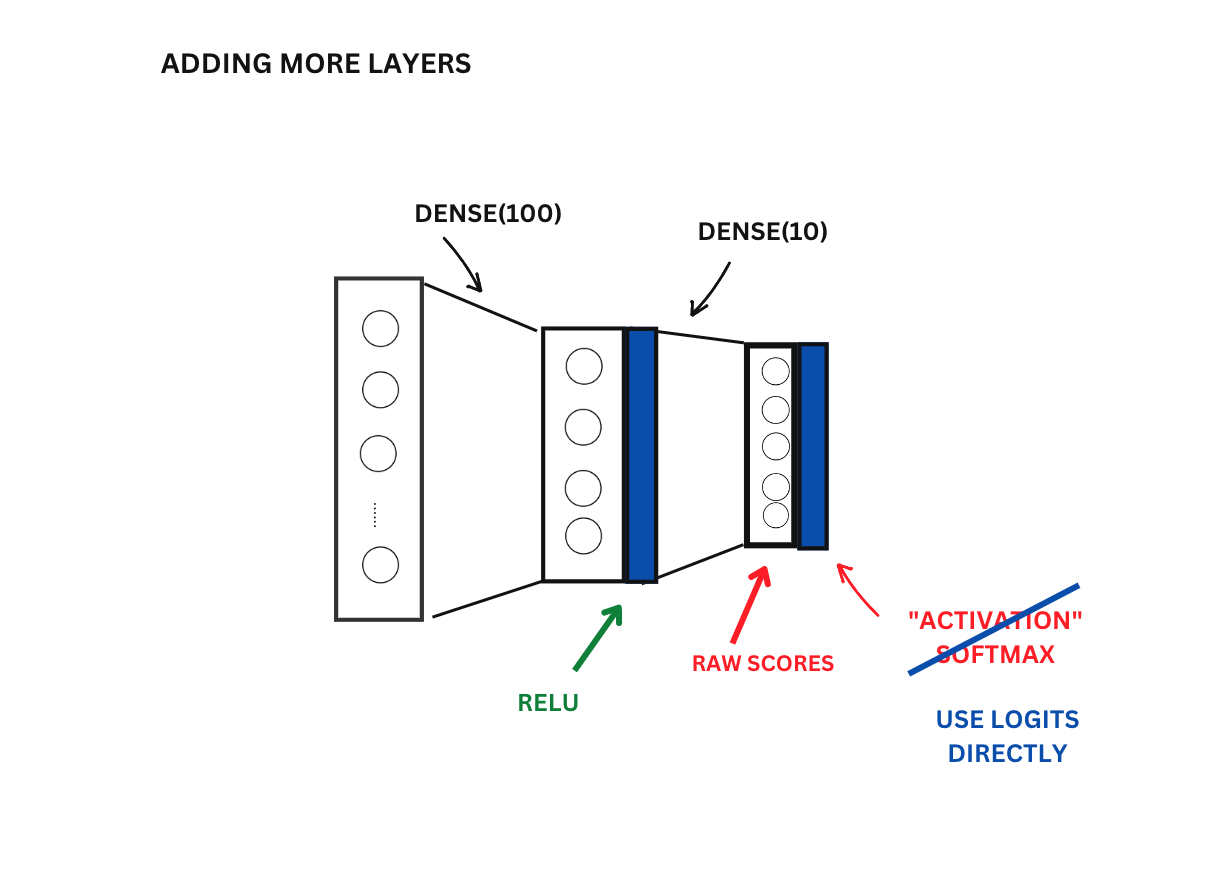

* For neural networks at the end we have something like softmax this softmax is called activation it takes the row scores from the Dense layer and it transforms then into a probability so this is called activation this transformation from rows of scores to something else is called activation, we actually don't use softmax here because we use logit directly but it's kind of implied that softmax is there because if we take the raw output of our model and turn it into probabilities by using softmax we'll have proper probabilities and then for this layer the one we just created we also need an activation neural networks each layer should have some tranformation to achieve better performance and the activation we will use here is called ReLU.

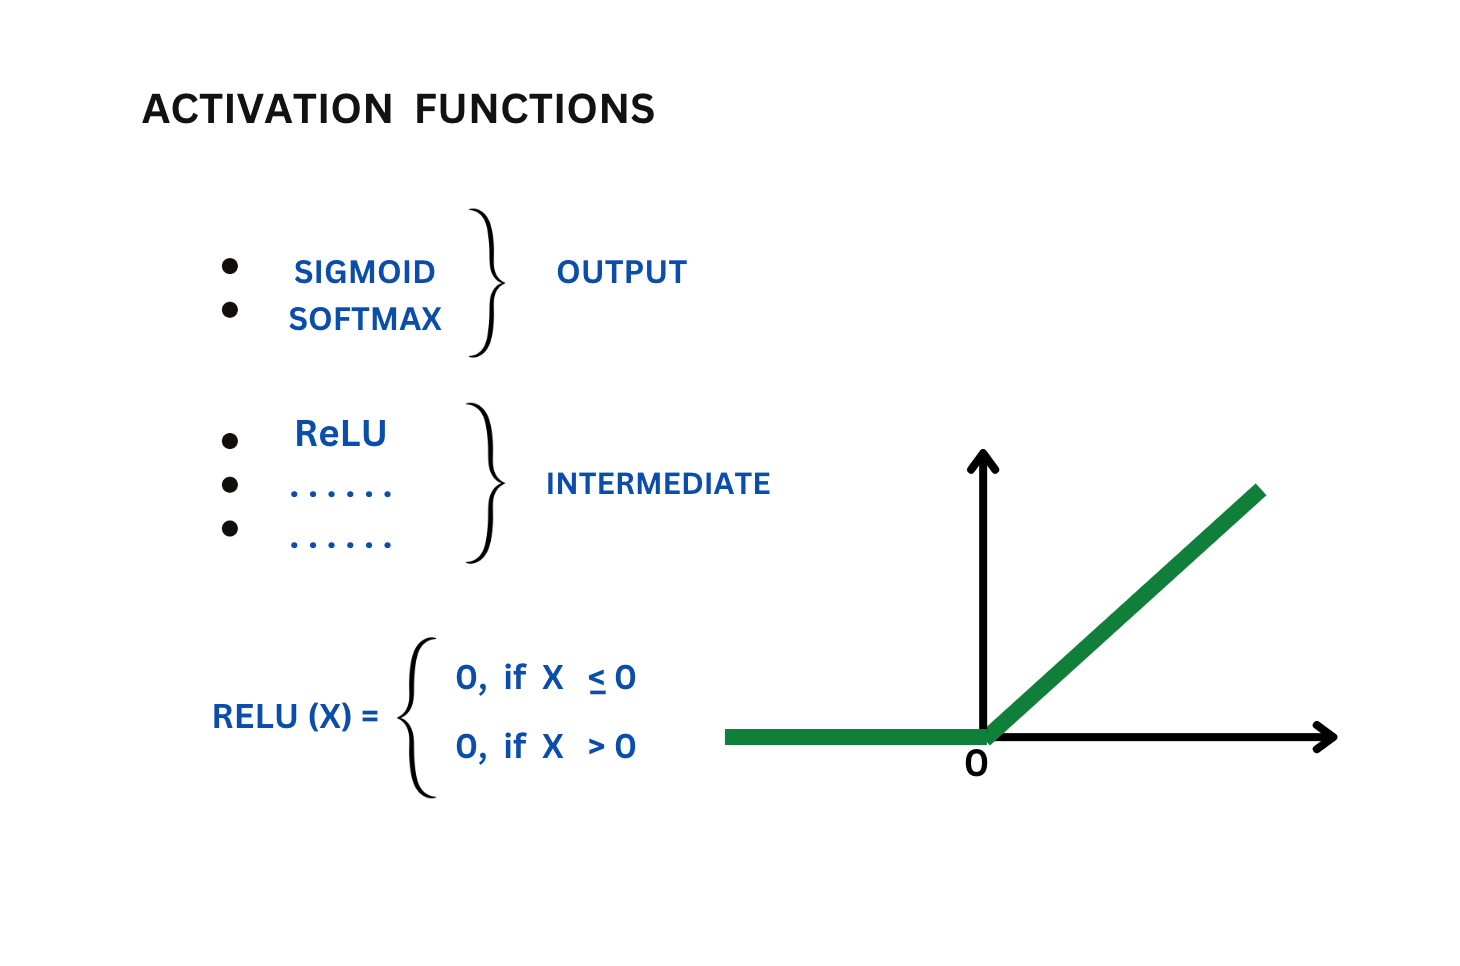

* There are actually bunch of different activation function we already know this sigmoid, the softmax and then there are a bunch of activations that are used for intermediate steps so one of them is called ReLU and there are a bunch of others.
* For ReLU the formula is ReLU(X) = { so if it's smaller than zero then we just set it to zero so if X is less or equal to zero if it's actually larger than zero then we set it to the value so relu stands for rectified linear unit and it's one of the most popular activation functions.


* Output the final layer with predictions the outputs take in the output of the inner layer so now it flows like that so from the vector representation it goes to the inner layer then we have the result the output of this inner layer goes to the final prediction output and then this is what we get when we do predict.

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 18s 155ms/step - loss: 1.4157 - accuracy: 0.5196 - val_loss: 1.0369 - val_accuracy: 0.6598
Epoch 2/10
96/96 [==============================] - 14s 144ms/step - loss: 0.9100 - accuracy: 0.6816 - val_loss: 0.8087 - val_accuracy: 0.7214
Epoch 3/10
96/96 [==============================] - 15s 154ms/step - loss: 0.7292 - accuracy: 0.7428 - val_loss: 0.7239 - val_accuracy: 0.7507
Epoch 4/10
96/96 [==============================] - 14s 145ms/step - loss: 0.6204 - accuracy: 0.7846 - val_loss: 0.7009 - val_accuracy: 0.7537
Epoch 5/10
96/96 [==============================] - 15s 154ms/step - loss: 0.5435 - accuracy: 0.8155 - val_loss: 0.6485 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 14s 145ms/step - loss: 0.4845 - accuracy: 0.8364 - val_loss: 0.6149 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 14s 146ms/step - loss: 0.4336 - accuracy: 0.8628 - val_loss: 0.6136 - val_accuracy: 0.7

In [ ]:
scores

{10: {'loss': [1.4157415628433228,
   0.910000205039978,
   0.729225218296051,
   0.6204074621200562,
   0.5434697866439819,
   0.4844582676887512,
   0.4335576295852661,
   0.3888918161392212,
   0.3479342460632324,
   0.3217194378376007],
  'accuracy': [0.5195567011833191,
   0.6815515160560608,
   0.7428292036056519,
   0.7845501899719238,
   0.8155149817466736,
   0.8363754749298096,
   0.862777054309845,
   0.8771186470985413,
   0.8976532220840454,
   0.9103650450706482],
  'val_loss': [1.036900281906128,
   0.8087003231048584,
   0.7238994240760803,
   0.7009286880493164,
   0.6484734416007996,
   0.6148789525032043,
   0.6135761737823486,
   0.5905575156211853,
   0.6053768992424011,
   0.6063423752784729],
  'val_accuracy': [0.6598240733146667,
   0.7214076519012451,
   0.7507331371307373,
   0.7536656856536865,
   0.7829912304878235,
   0.7888563275337219,
   0.7976539731025696,
   0.7917888760566711,
   0.7947214245796204,
   0.7859237790107727]},
 100: {'loss': [0.988428533

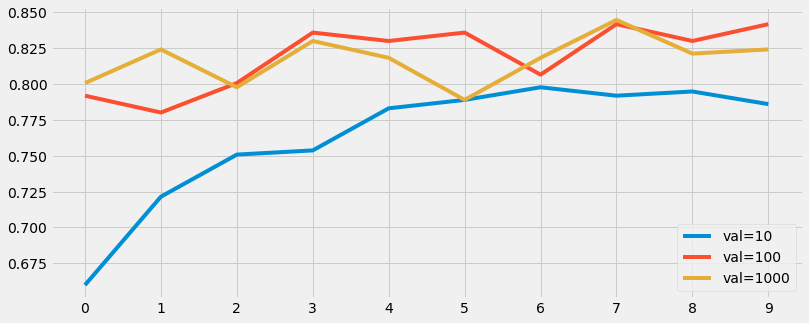

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

* Before that this 100(red color) was the best one but here to be honest I don't see any difference which makes me wonder if we should include any extra layer here or not perhaps I should have tried training for a longer time but then again like here just starts oscillating.
* 10 and 100 dense have similar performance.

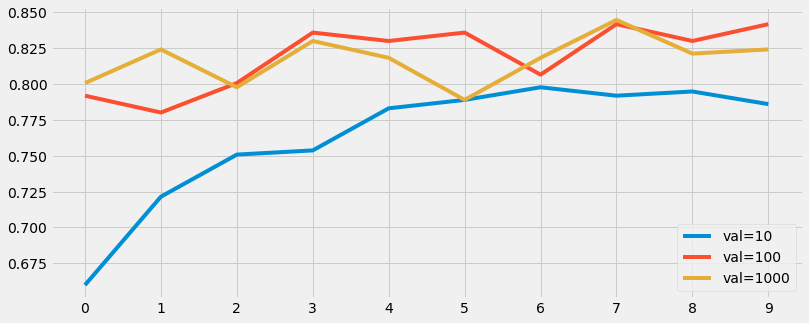

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## **8.9 Regularization and dropout** (video 9)

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

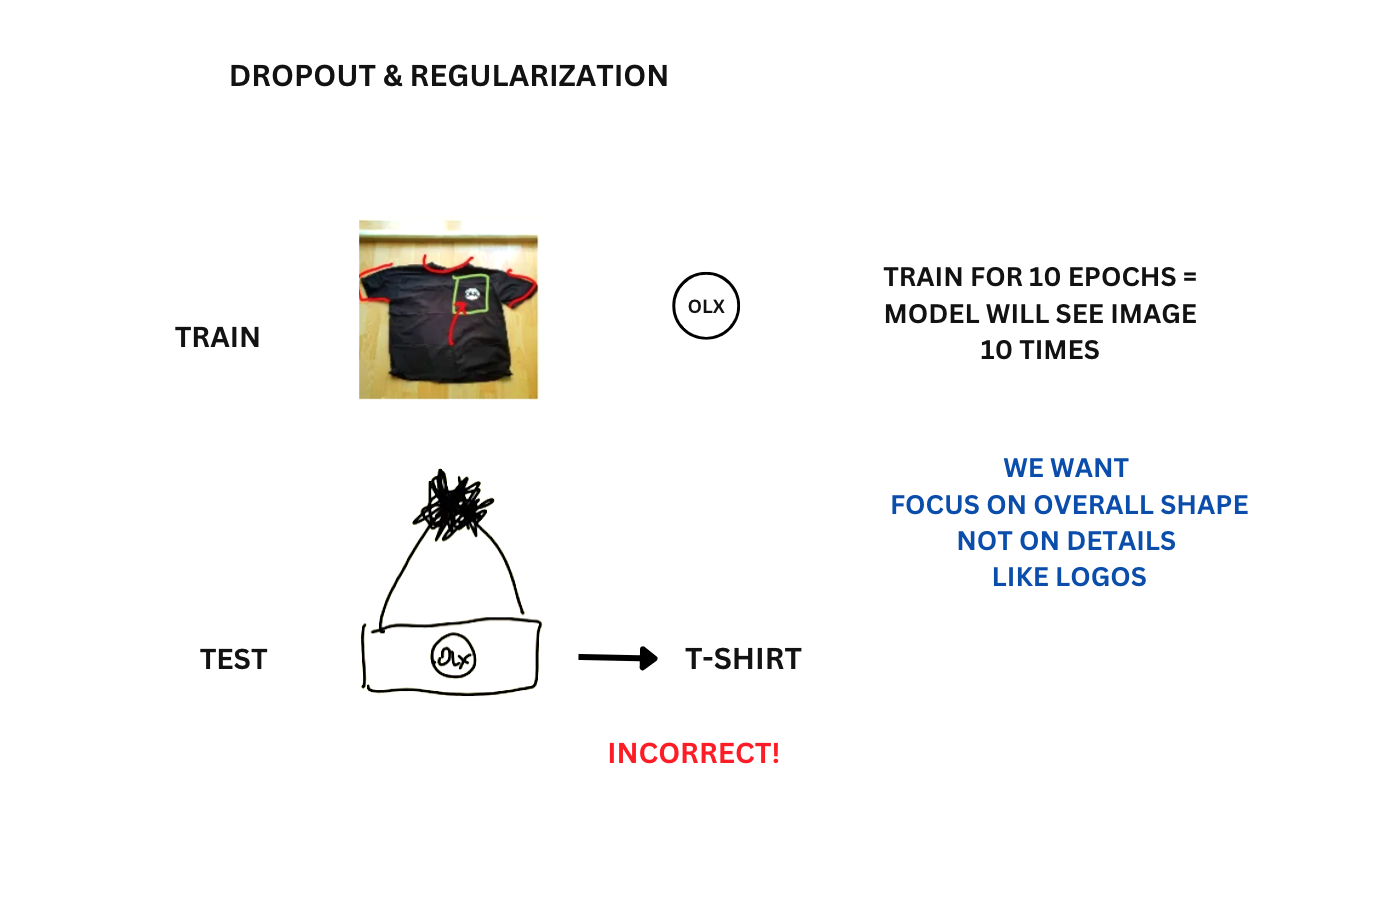

* We want to classify as a t-shirt and then in this image we see that there is in this area a circle with a logo  inside if and if we train our model for 10 epochs it means that we will go over our dataset 10 times our neural network will see this image 10 times and when it sees it that many times and if we do this is a neural network might recognize a pattern that every time we see logo like this it must be a t-shirt a role like that might not actually generalize because maybe we have a hoodie with this logo or long sleeve.
*  A head with this logo so if during test time we see a head with this logo neural network might think okay like I've seen this logo must be a t-shirt which is not what we want to have so we want a neural network rather focus on a thing like a sleeve, collar, and things like this so shapes more than specific details like logo.
* In dropout we take input and dropout is not the image we randomly hide a part of the input we will see how dropouts work but you should add a remark here that the part doesn't hide part of the image but applies to inner layers.


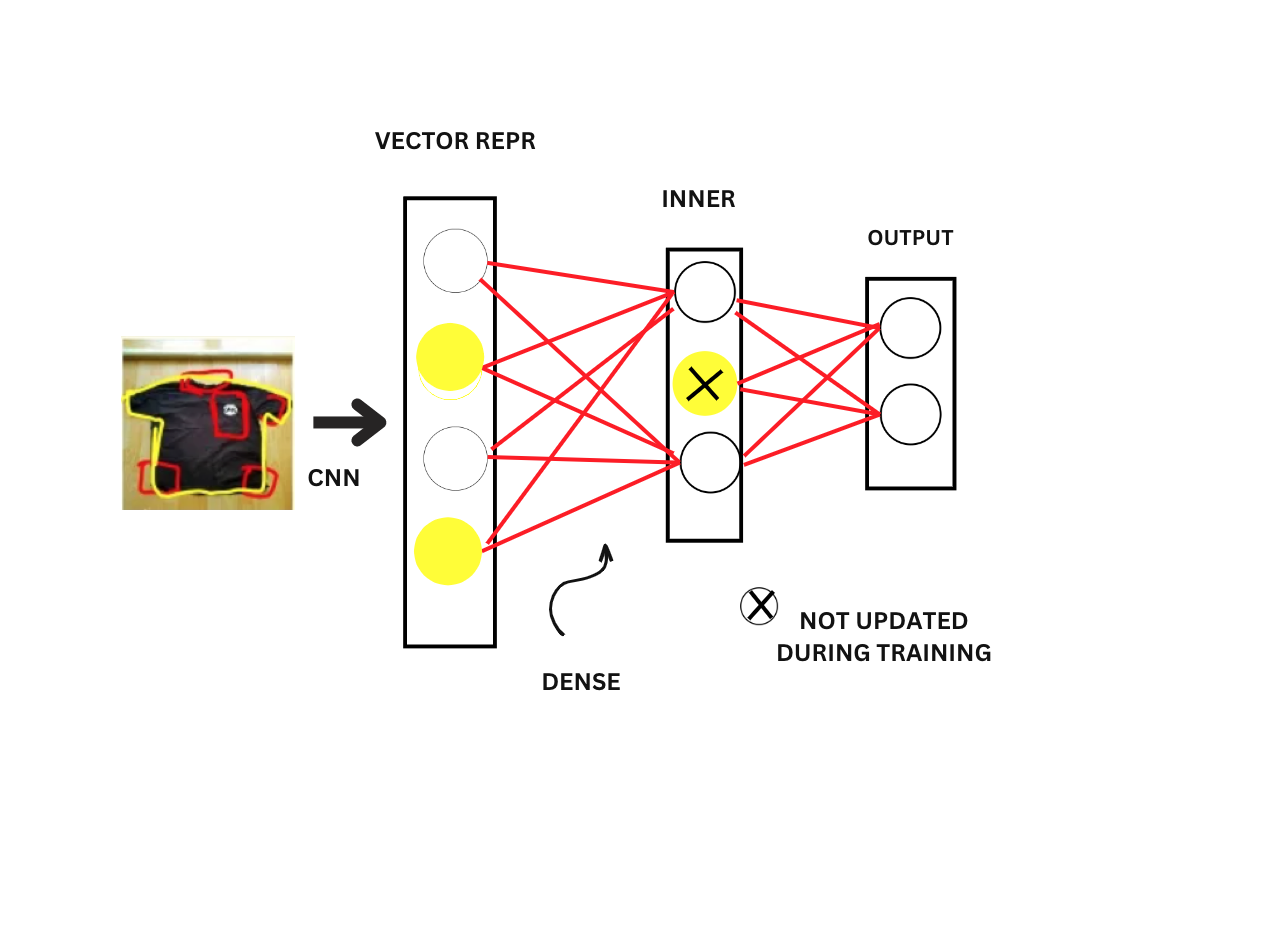

* Have a bunch of convolutional layers so I'll just use CNN here and then what we get is vector representation the way convolutional layers work is the filter picks up some visual features of the image like sleeves and then this goes some part of the vector so let's say this part of the have some values if there are sleeve on the image, this part s a collar maybe this goes here and if also could be that if there is a circle image it goes to a part of the vector representation is a quite a large vector so the dimensionality of this vector 2048 so it's quite a large vector.
* Vector representation and we have our inner layer that has let's say three so since it's a dense layer every input is connected to everyone everything is connected here now for dropout we take a layer so this is our dense layer and we freeze a part of this layer we say that this part X here does not get updated we run our iteration of a neural network training and we say that this iteration we do not want to update the part of the layer let's say it's frozen what happens is during training these connections are some during this specific step of training we only update but this one is frozen.
* vector representation for a circle with a logo then this neuron here will not get this information and will not see it because this connection is frozen and then on the next iteration we freeze this one and that one is not frozen on the next iteration we freeze something else so every time we freeze different parts of the network that's why it's almost the same as we buy the part of the input here because this is what effectively happens to go back to this one is not updated so maybe the input is not taken into account for this particular neuron this one and effectively part of the image is ignored.
* One more layer is the output layer and when a part of a neural the network is frozen the output still gets all flares so we just don't update this part but it doesn't mean that the output of the next layer doesn't look at this it does look at this so, that's the main idea behind dropout we randomly freeze a part of in network and we can implement this for that.


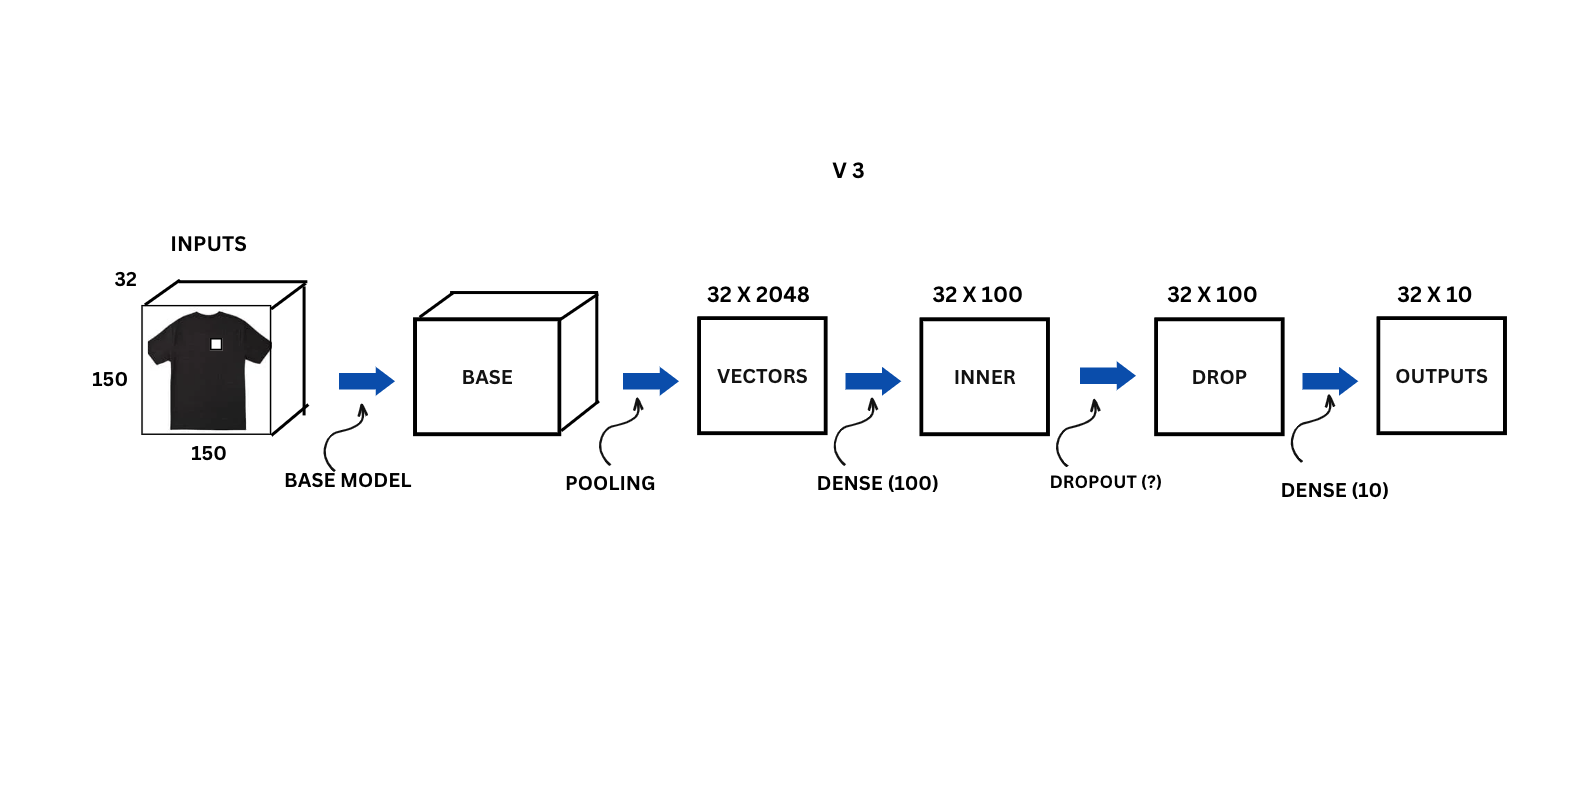

* Versions 3, 10, and 100 are equally good.
* Part of the network here is inner/dense(100) we want to add dropout here to regularize this part and here regularization.
* regularization is a way to avoid depending on this pattern when making predictions.

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

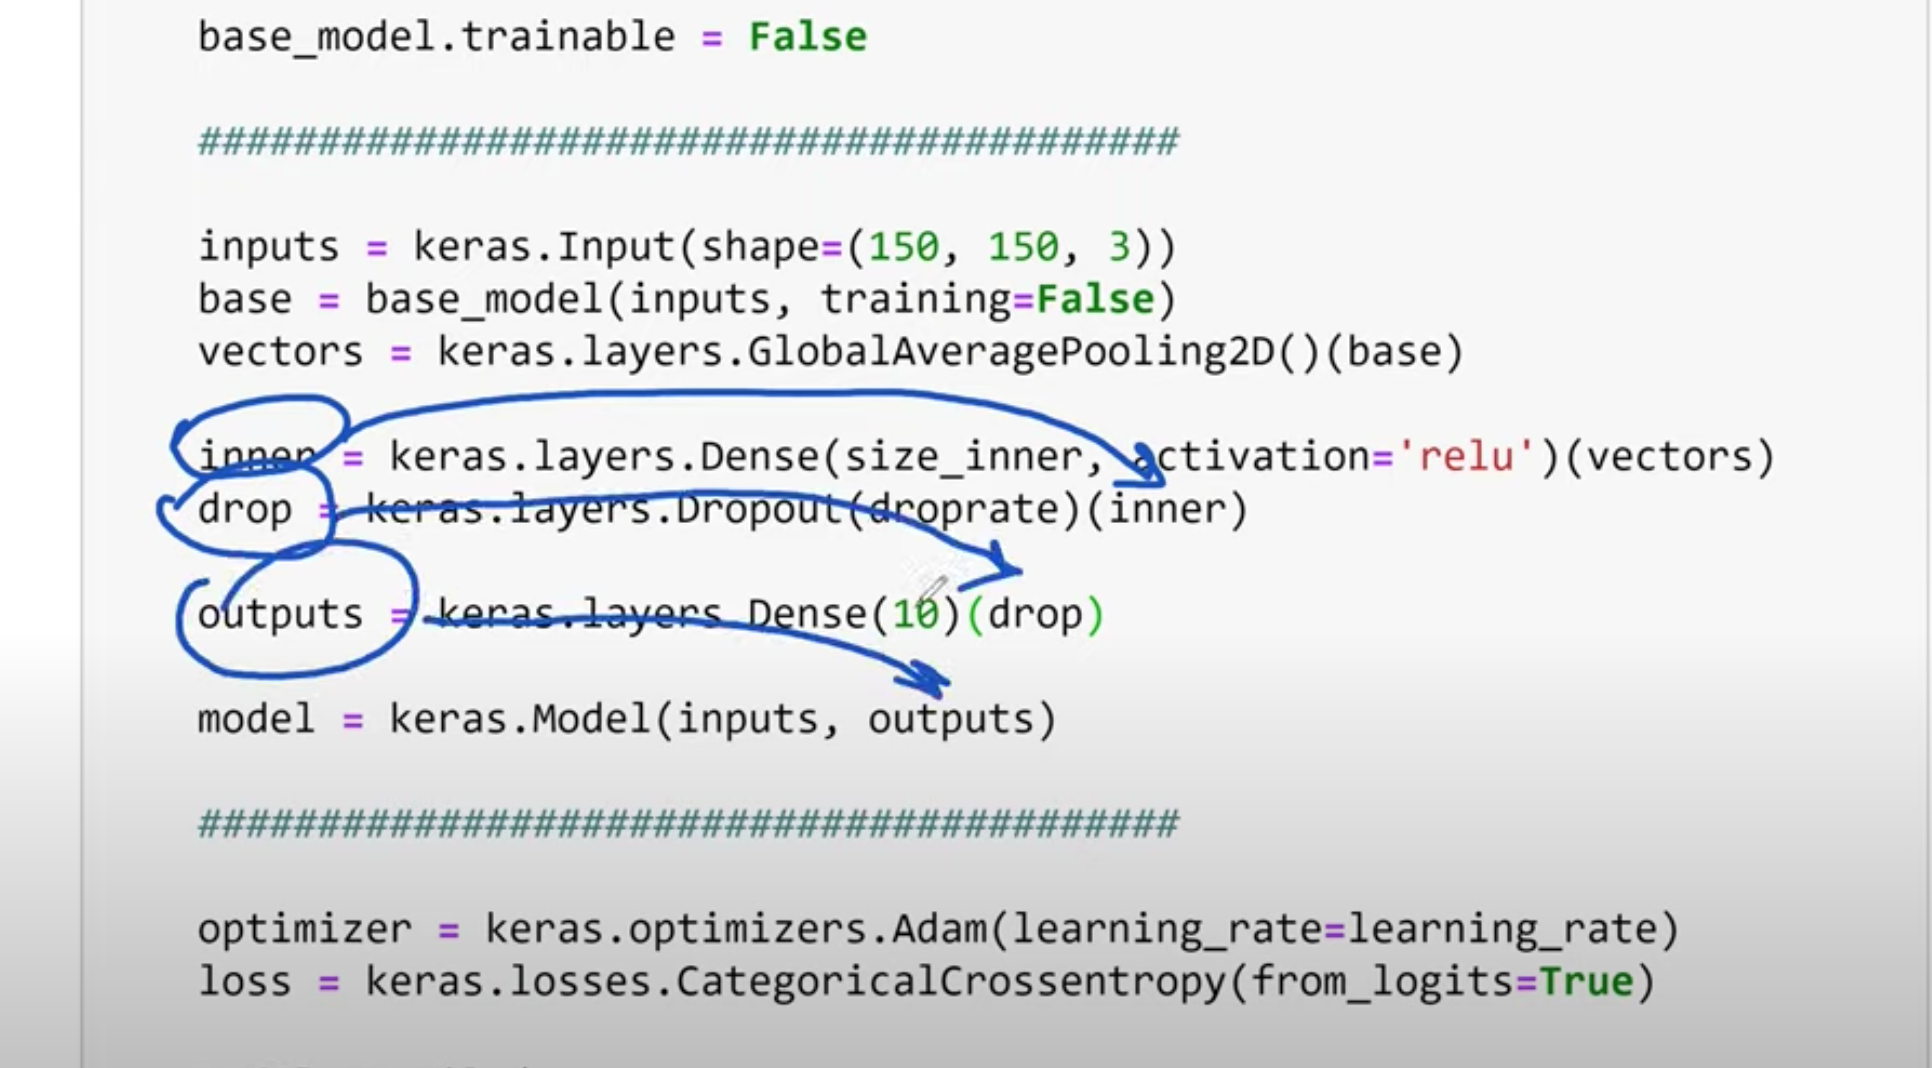

* dropout, so this is how it flows the inner goes to drop out the output of the dropout goes to the final output and the final output is what we get the prediction.

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 18s 159ms/step - loss: 0.9656 - accuracy: 0.6744 - val_loss: 0.6731 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 14s 147ms/step - loss: 0.5064 - accuracy: 0.8276 - val_loss: 0.5442 - val_accuracy: 0.8182
Epoch 3/30
96/96 [==============================] - 15s 153ms/step - loss: 0.3517 - accuracy: 0.8869 - val_loss: 0.5714 - val_accuracy: 0.8094
Epoch 4/30
96/96 [==============================] - 14s 146ms/step - loss: 0.2538 - accuracy: 0.9192 - val_loss: 0.5400 - val_accuracy: 0.8211
Epoch 5/30
96/96 [==============================] - 15s 154ms/step - loss: 0.1797 - accuracy: 0.9531 - val_loss: 0.5773 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 14s 147ms/step - loss: 0.1351 - accuracy: 0.9687 - val_loss: 0.5752 - val_accuracy: 0.8299
Epoch 7/30
96/96 [==============================] - 14s 146ms/step - loss: 0.0931 - accuracy: 0.9804 - val_loss: 0.6159 - val_accuracy: 0.

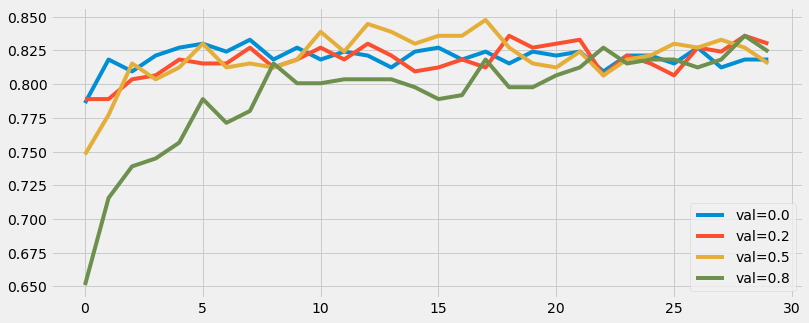

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

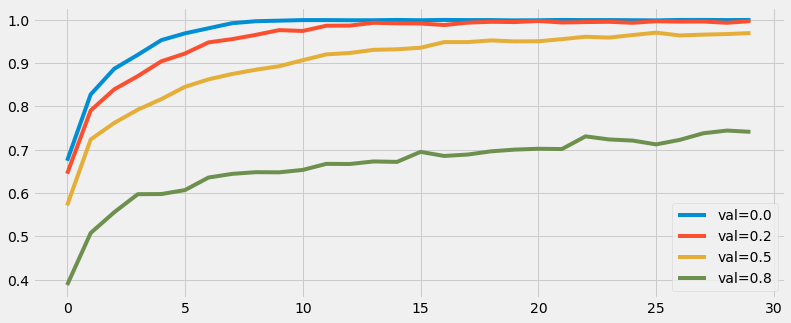

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label=('val=%s' % droprate))

#plt.ylim(0.78, 0.86)
plt.legend()

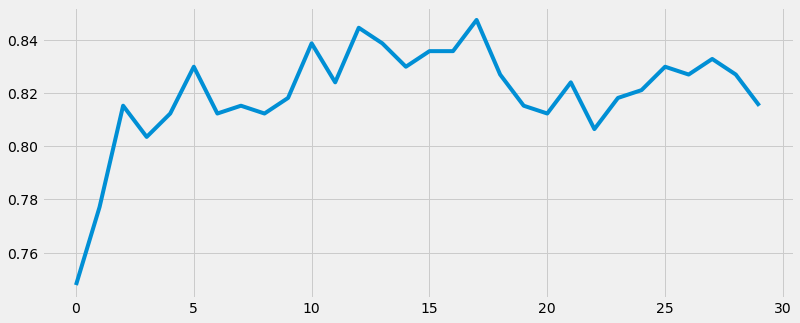

In [ ]:
hist = scores[0.50]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))


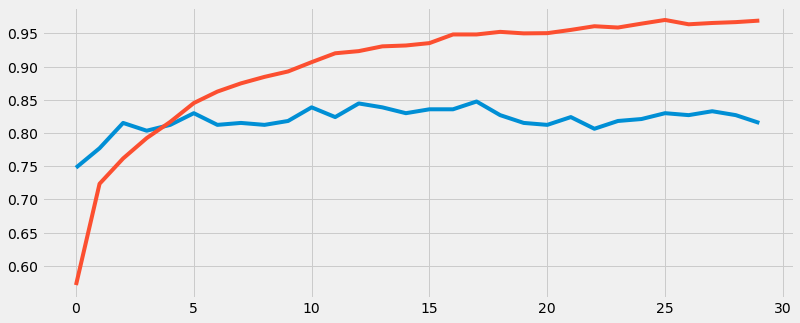

In [ ]:
hist = scores[0.50]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
plt.plot(hist['accuracy'], label=('val=%s' % droprate))


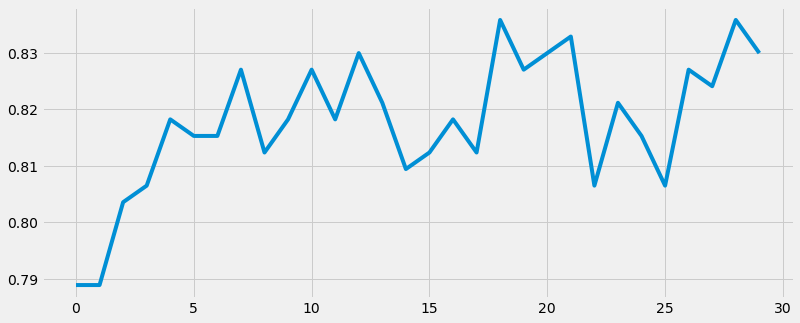

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))


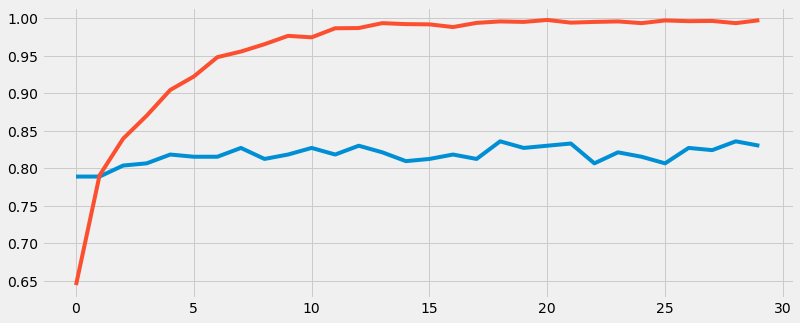

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
plt.plot(hist['accuracy'], label=('val=%s' % droprate))

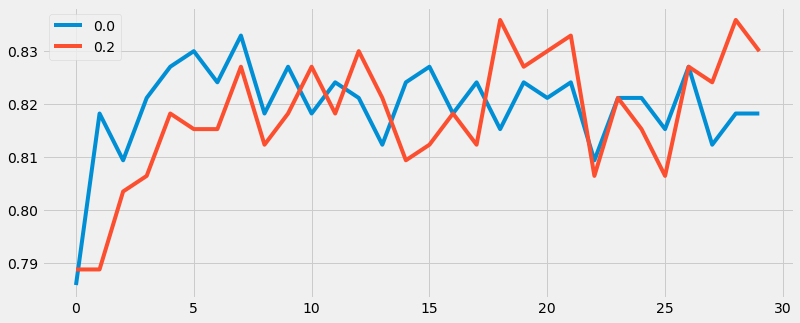

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## **8.10 Data augmentation** (video 10)

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

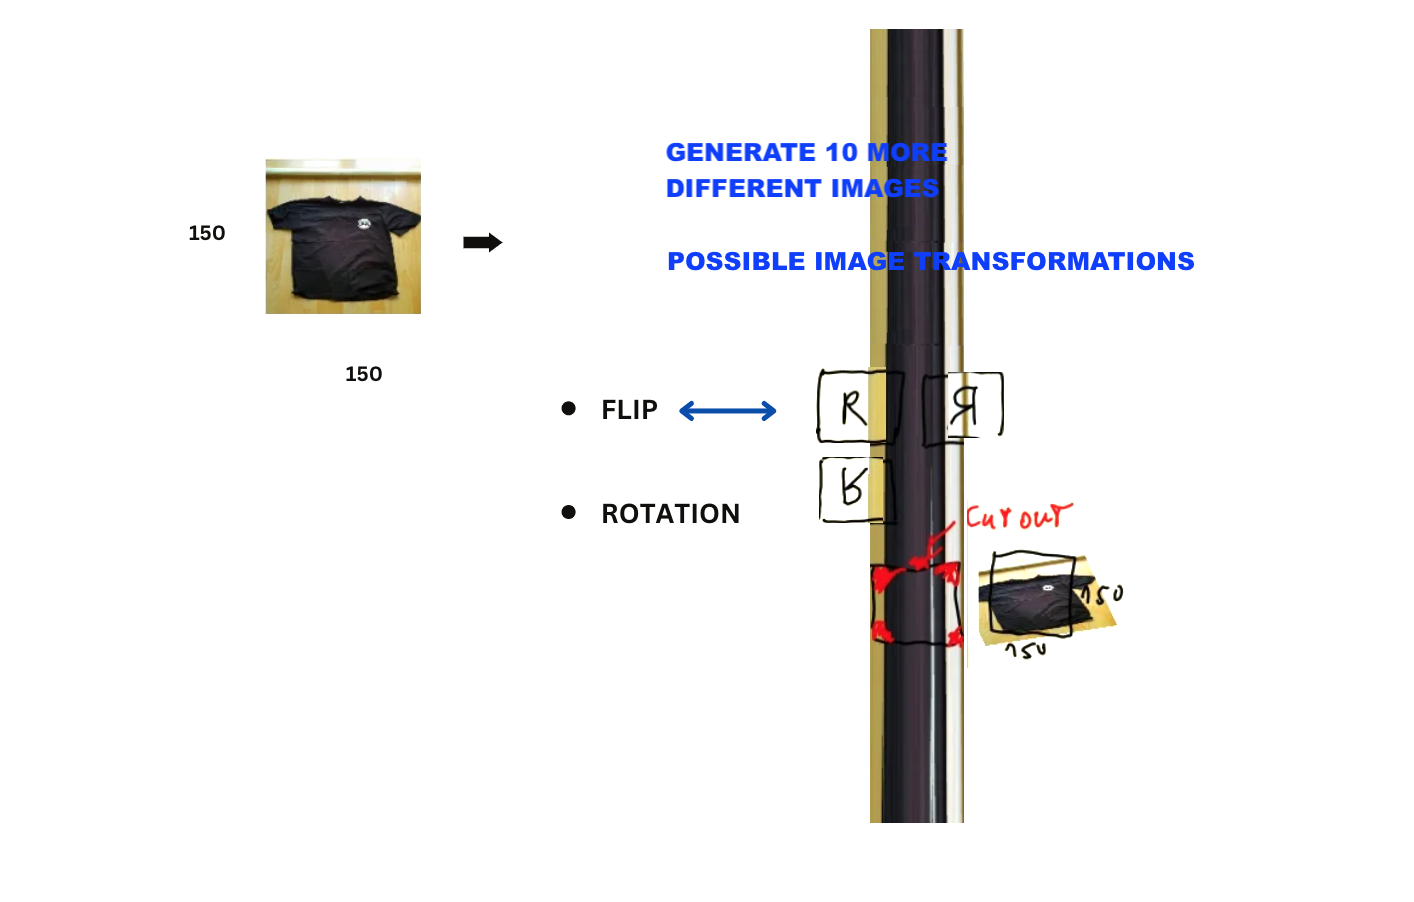

* Generate 10 more different images so then the neural network will not see exactly the same image everytime actually there are many many different things that we can do to generate more images fro existing ones there are simple image transformations that we can use to generate more data first of all let's say we have this image and we want to generate more pictures from this there is one simple thing that we can do is we can just take this image and flip it so this is our image transformation first thing we can do is we can just take an image and flip it horizontally and vertically I will not use the t-shirt here because I cannot flip it in this up I will just draw it so let's say we have a letter R so what we can do is we can flip it will be sort of like mirroring R  this would be I don't remember if it's a vertical flip or horizontal flip but we take this image and flip it then we can flip also along this dimension this would be I guess horizontal flip not sure but then our R will be upside down that would be a different way of flipping I have some code for generating these transformations.


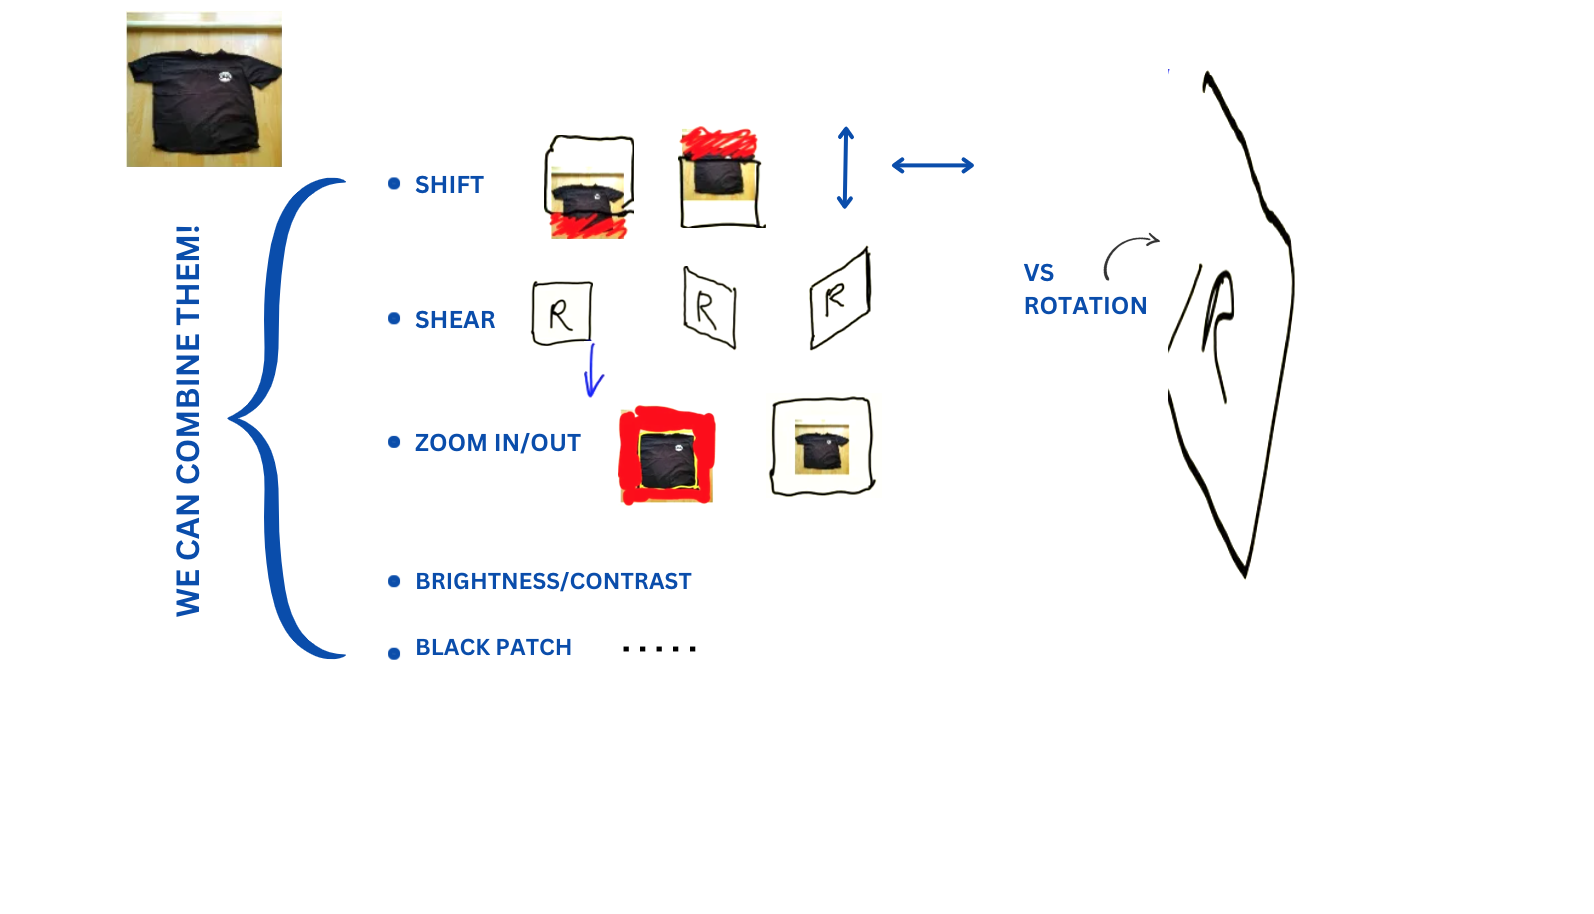

* Next transformation is rotation we take our image and we rotate it so we can rotate it clockwise or counterclockwise so our image still has to be squared so this would be our image so we will need to cut out all these parts we remove and somehow need to fill these parts so it still looks like an image and the same happens here we kind of lose a part of the image but it still stays 150 by 150 so the original one let's say it's also 150 by 150 but we rotate it actually in the dataset that we have some of the images are not always positioned perfectly so sometimes there are slight variations slight rotations so maybe for our dataset it makes sense to generate an image like that in Keras.
* We can shift so again and the transformation we can make is shifting it a bit up or down or left and right as well.
* The image here we cut this part or red color in drawing this part and whatever is left we use is our image that we fit with the neural network we can move things horizontally or we can move things vertically.

In [ ]:
import numpy as np
import pandas as pd

from PIL import Image

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

Let's create some helper functions for doing the augmentations


In [ ]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [ ]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [ ]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    

Now we let's load an image

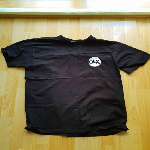

In [ ]:
tshirt = Image.open('./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

Now let's check different augmentations

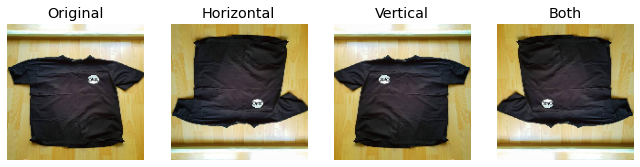

In [ ]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 

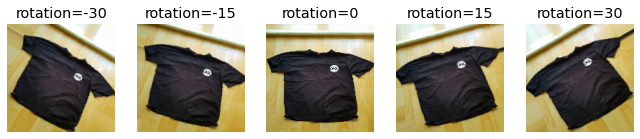

In [ ]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

* We can also do this rotation transformation and the parameter for this transformation is the number of degrees how much we rotate you see it can be positioned and it can be negative when it's negative we rotate counterclockwise by 30 degrees and you the actual image was like that what Keras did it took this out cut these corners away and then it made an educated guess how exactly it should preview these corners so I think it took whatever pixels were there and just kind of extended them now and the same here if counter-clockwise and when it's positive it's clockwise so here we rotate by 30 degrees as well.

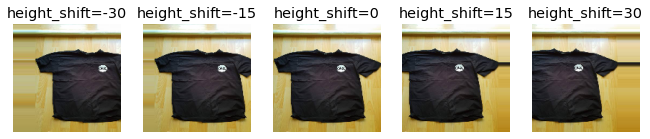

In [ ]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))


* Then another transformation we can do is shifting.
* This is keras and keras we specify so when we say we want to shift it like it's called height shift let's call it vertical shift basically we are moving along this dimension so when it's negative we're moving it down and then it's positive we move it up and then you see this is the image and we move it like 30 percent down we cut the part away cut it out and then here we take this line and repeat it so this parameter here height_shift =15 is like how much we put it up or down in percent and the same with width shift.

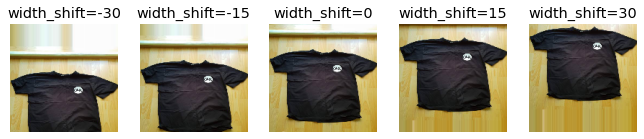

In [ ]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

* The width_shift instead of moving it up or down we move it to the right when it's negative and move it to the left when it's positive, so this is shifting.

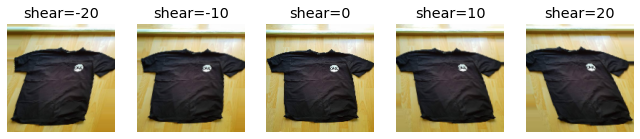

In [ ]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

* shearing = 20, it can be positive, negative, and positive this is like either you move this corner or this down.

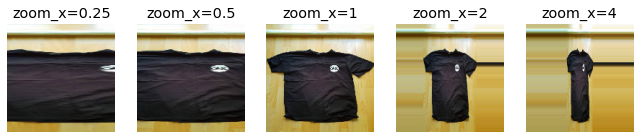

In [ ]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

* You can zoom in and zoom out here we have an example that we just shrink (zoom_x= 4) this our image and we shrink it only along the (x=4) dimension so along the y dimension it's not zoomed so it stays as is but we kind of shrink if so actually you see x=one is no transformation at all x=two we should shrink it two times x=four which shrink it four times it it's below one then we are kind of pooling it the actual image is like that and we're just cutting out this and in case of when zoom is 0.24 so we're kind of pooling it for four times so the image maybe it looks like that zoom x=0.25 cut on top and bottom and we cutting this out and we're leaving only this part we can do the same for the y dimension can shrink and zoom.

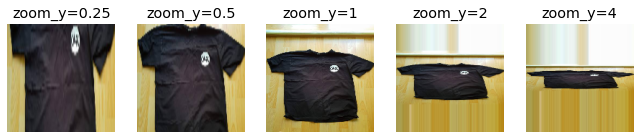

In [ ]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

We don't need to implement it manually, we can use ImageDataGenerator for that

In [ ]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

* So we used Image data generator and it has a bunch of parameter so rotation range width, height,shear, zoom and so on we can actually just take this image data generator and use that for training our model.
* We used the image data generator and it has a bunch of parameters that we can specify to do data augmentation now, we need to specify some parameters.
* These are potential thing that we can experiment with for example if we put 30 here it means that we want to generate images that are rotated randomly the rotation degree (-30,30) is chosen in the range with between -30 and 30, there is an image and we can either rotate it by minus 30 or 30 or by 10 minus 10, 10 0, or any number between so it just selects a number randomly between  -30 and 30 and rotates by this degree then the same here for width_shift_range and height_shift_range, let's say if we put range 10 and here 10 it would use a range from minus 10 to 10 and I think this is inclusive so here for rotation it's also minus 30,30.
* Zoom range we just specify actually, it just gives one number.

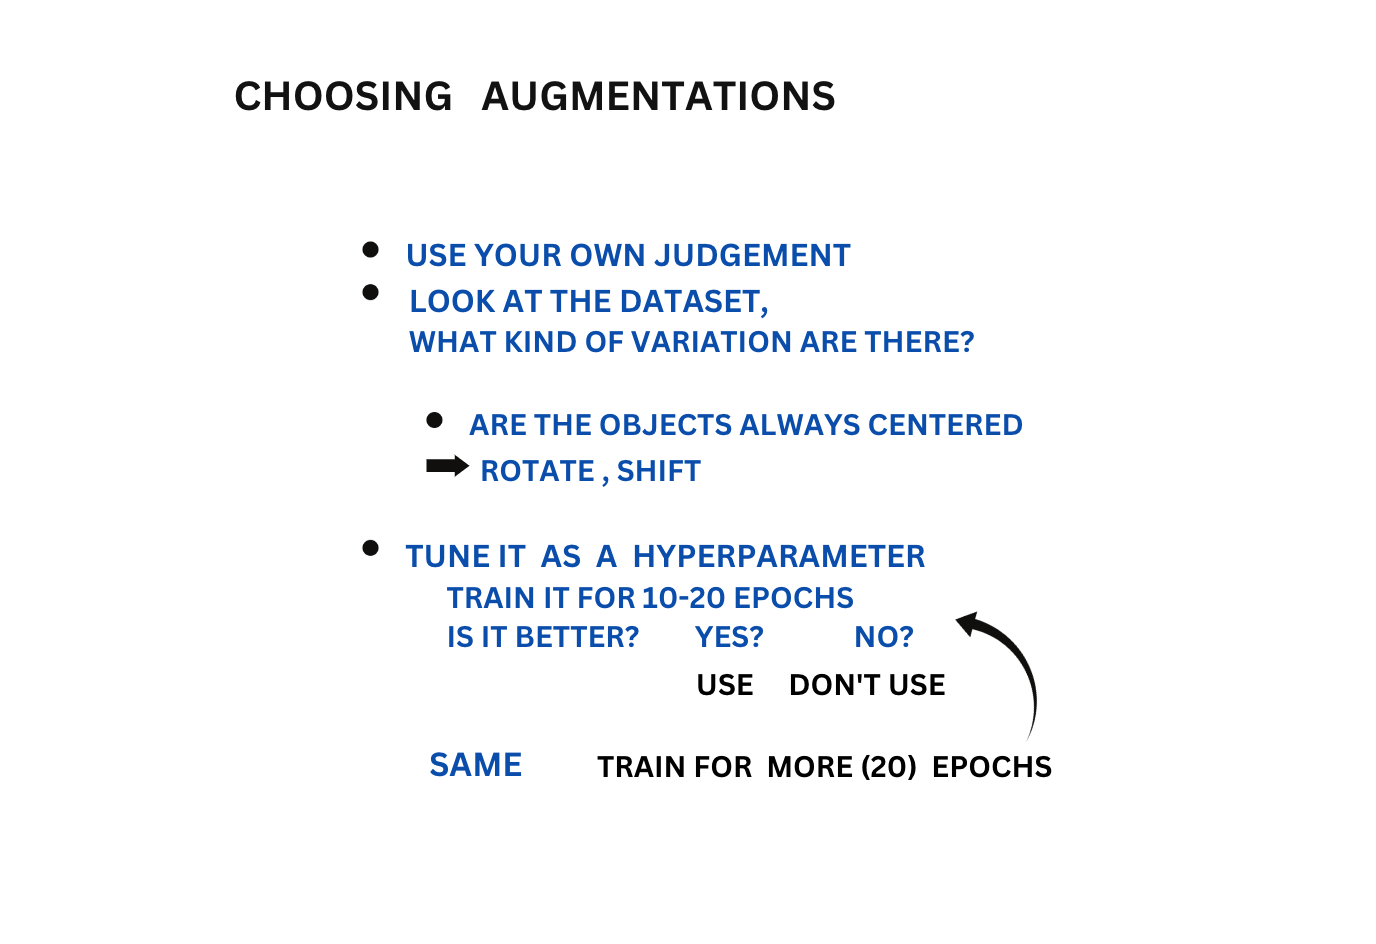

* We use our own judgment if we want to apply an augmentation does it make sense, like in our cases does horizonal flip make sense not so much because all the images we have in our data set they are always positioned correctly so we don't have image that are upside down and it's actually true for both validation and testing and this is the kind of data we expect to see in the future so let's say if we don't expect to see t-shirts turned upside down when we apply the model then we don't need to generate this kind of augmentation but vertical flip it kind of make sense because clothes usually is symmetrical like heads shoes basically everything all the clothes we use most of them to look symmetrical.

In [ ]:
x = np.array(tshirt)

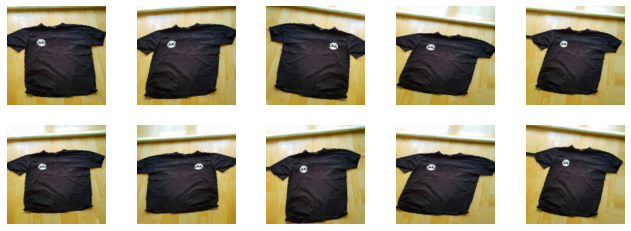

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

* Combine them, do it so you see this case it was slightly rotated so this one was rotated and flipped this one was rotated a bit this I think we applied shear transformation here 80 you see every time we get a slightly different image it's still all the same image it's stll a t-shirt and you can see that the shape of the t-shirt is almost always preserved like it's just a little bit different, and ther are many different ways how you can put a t-shirt in your floor and then take a picture it's not always ideally positioned, and here we are kin of modeling situation.

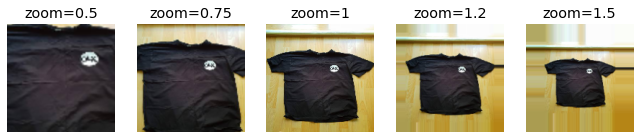

In [ ]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 18s 156ms/step - loss: 1.0737 - accuracy: 0.6405 - val_loss: 0.7027 - val_accuracy: 0.7801
Epoch 2/50
96/96 [==============================] - 15s 154ms/step - loss: 0.6238 - accuracy: 0.7829 - val_loss: 0.6146 - val_accuracy: 0.8065
Epoch 3/50
96/96 [==============================] - 14s 144ms/step - loss: 0.4654 - accuracy: 0.8452 - val_loss: 0.5872 - val_accuracy: 0.8270
Epoch 4/50
96/96 [==============================] - 15s 154ms/step - loss: 0.3682 - accuracy: 0.8768 - val_loss: 0.5804 - val_accuracy: 0.8123
Epoch 5/50
96/96 [==============================] - 14s 145ms/step - loss: 0.3035 - accuracy: 0.8983 - val_loss: 0.5308 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 14s 144ms/step - loss: 0.2290 - accuracy: 0.9276 - val_loss: 0.5529 - val_accuracy: 0.8270
Epoch 7/50
96/96 [==============================] - 15s 153ms/step - loss: 0.1838 - accuracy: 0.9443 - val_loss: 0.5478 - val_accuracy: 0.8328

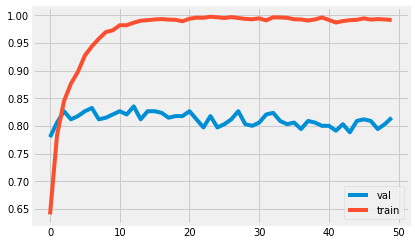

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

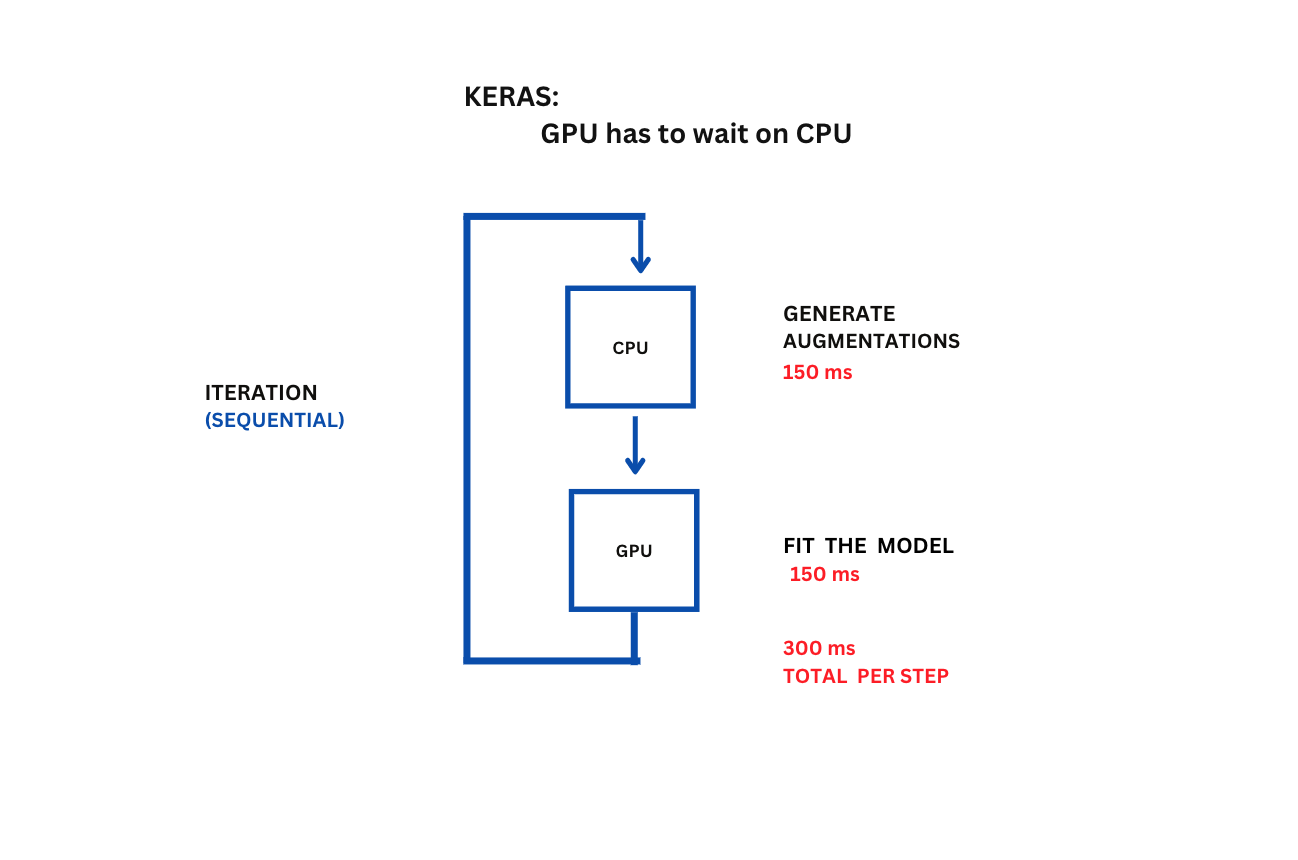

* We have a GPU and we have a CPU so what happens in the case of Keras we first use the CPU to generate augmentations and then we use GPU to fit the model and we do this set degeneration.
* Now it spends two times more so around 150 milliseconds here and 150 milliseconds here this is the reason, first of all, it's slower, and second the GPU is not utilized 100 percent.
* To avoid that there are more complex things.

## **8.11 Training a larger model** (video 11)

* Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 82s 813ms/step - loss: 0.9876 - accuracy: 0.6842 - val_loss: 0.5757 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 77s 797ms/step - loss: 0.5205 - accuracy: 0.8214 - val_loss: 0.4395 - val_accuracy: 0.8592
Epoch 3/50
96/96 [==============================] - 76s 792ms/step - loss: 0.4329 - accuracy: 0.8533 - val_loss: 0.4164 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 76s 790ms/step - loss: 0.3864 - accuracy: 0.8703 - val_loss: 0.4049 - val_accuracy: 0.8651
Epoch 5/50
96/96 [==============================] - 76s 790ms/step - loss: 0.3462 - accuracy: 0.8872 - val_loss: 0.3718 - val_accuracy: 0.8651
Epoch 6/50
96/96 [==============================] - 76s 789ms/step - loss: 0.3281 - accuracy: 0.8797 - val_loss: 0.3551 - val_accuracy: 0.8886
Epoch 7/50
96/96 [==============================] - 76s 786ms/step - loss: 0.2995 - accuracy: 0.8999 - val_loss: 0.3686 - val_accuracy: 0.8798

## **8.12 Using the model** (video 12)

* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [ ]:
model = keras.models.load_model('xception_v4_1_25_0.894.h5')

In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 290ms/step - loss: 0.2875 - accuracy: 0.8978


[0.28745338320732117, 0.897849440574646]

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

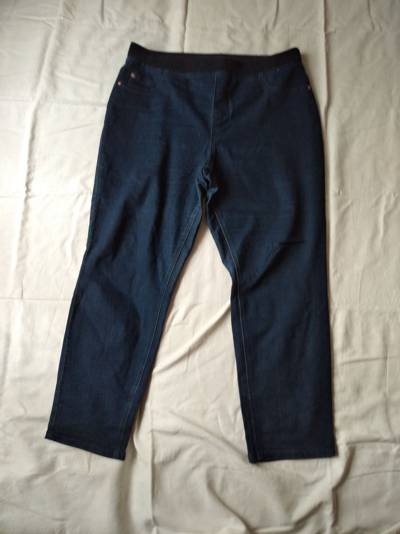

In [ ]:
load_img(path)

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 1s 677ms/step


In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

{'dress': -2.7085006,
 'hat': -4.8741436,
 'longsleeve': -0.18174297,
 'outwear': -0.91185373,
 'pants': 12.414254,
 'shirt': -2.3922973,
 'shoes': -4.0853906,
 'shorts': 5.673141,
 'skirt': -2.3492818,
 't-shirt': -1.5643936}

## **8.13 Summary**

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## **8.14 Explore more**

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images